In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

In [8]:
ndata = pd.read_csv('ExportRetail_utf8.csv', sep = ';')

C:\Users\1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = pd.read_excel('Продвижение.xlsx')

In [4]:
i = df['ISBN']
i.dropna(inplace = True)

In [9]:
ndata['Prom'] = ndata['ISBN'].apply(lambda x: 1 if x in i else 0)

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [10]:
ndata['Prom'].value_counts()

0    1827685
1       7694
Name: Prom, dtype: int64

In [11]:
def month(x):
    if x in [1,2,3]:
        return 1
    elif x in [4,5,6]:
        return 2
    elif x in [7,8,9]:
        return 3
    elif x in [10,11,12]:
        return 4

In [12]:
ndata['Квартал'] = ndata['Месяц'].apply(month)

In [5]:
i = i.to_numpy(dtype = str)

In [6]:
i = np.char.strip(i)

In [13]:
ndata1 = ndata[ndata['Год'] == 2020]

In [14]:
ndata1 = ndata1[ndata1['Квартал'] != 4]

In [15]:
df = ndata1.groupby(by=['ISBN', 'Месяц', 'Тип_Данных']).sum()

In [17]:
df = df.drop(['Год'], axis=1)

In [18]:
df = df.reset_index()

In [19]:
df = df.set_index(['Месяц', 'Тип_Данных'])

In [20]:
df = df[df['Тип_Данных'] != 'Отгрузки']

KeyError: 'Тип_Данных'

In [21]:
df.head()

,,ISBN,Кол-во,Prom,Квартал
Месяц,Тип_Данных,,,,
8,Отгрузки,05492,1,0,3
7,Отгрузки,2070-225-6,5,0,3
2,Лабиринт,3-8290-2899-7,1,0,1
8,ЧитайГород,3-8290-2899-7,1,0,3
1,Ozon,3-8290-5418-1,1,0,1


In [26]:
#months only
mon = pd.pivot_table(df, values=['Кол-во'], index=['ISBN'],
                    columns=['Месяц'], aggfunc={'Кол-во':np.sum})

In [22]:
#pd.pivot_table(df, values=['Кол-во'], index=['Месяц', 'Тип_Данных'],
                    #columns=['Prom'], aggfunc={'Кол-во':[np.sum, np.mean]}, fill_value=0)

In [23]:
#pd.pivot_table(df, values=['Кол-во'], index=['ISBN'],
                    #columns=['Месяц', 'Тип_Данных'], aggfunc={'Кол-во':np.sum})

In [33]:
#психология
p1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОПУЛЯРНАЯ ПСИХОЛОГИЯ')]
p2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОПУЛЯРНАЯ ПСИХОЛОГИЯ')]
p3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОПУЛЯРНАЯ ПСИХОЛОГИЯ')]

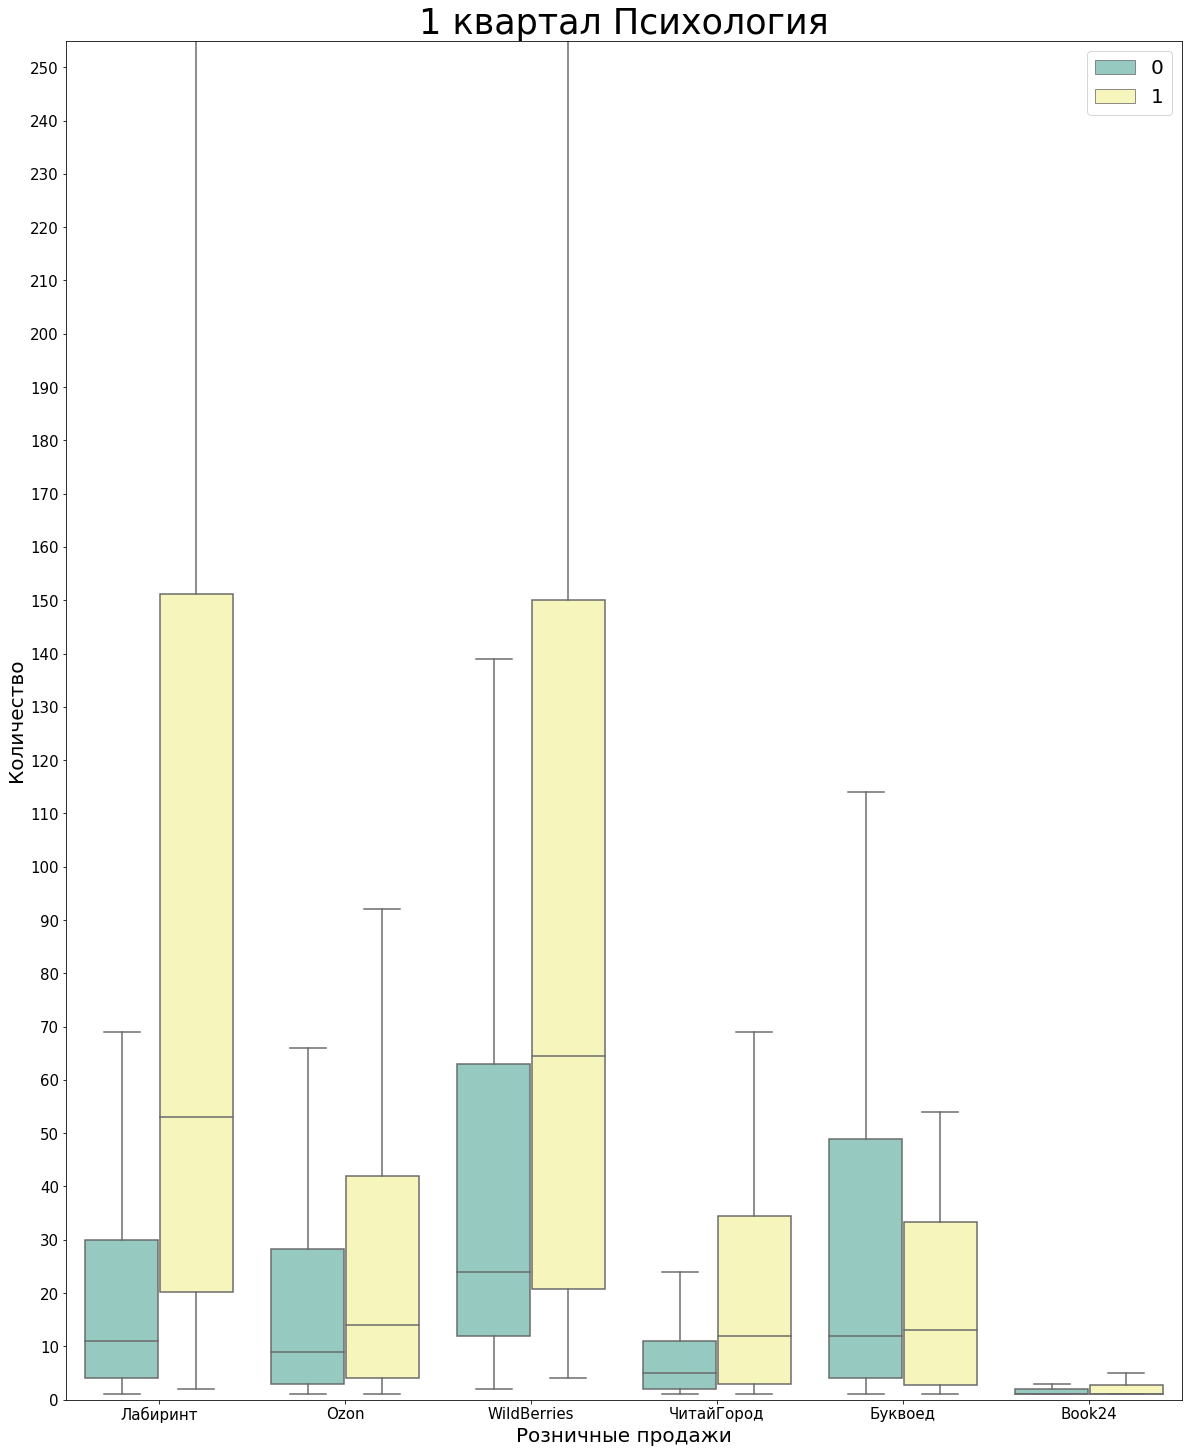

In [42]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = p1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Психология",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('p1.png', transparent = True)

In [37]:
tp1 = p1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tp1.to_excel('tp1.xlsx')

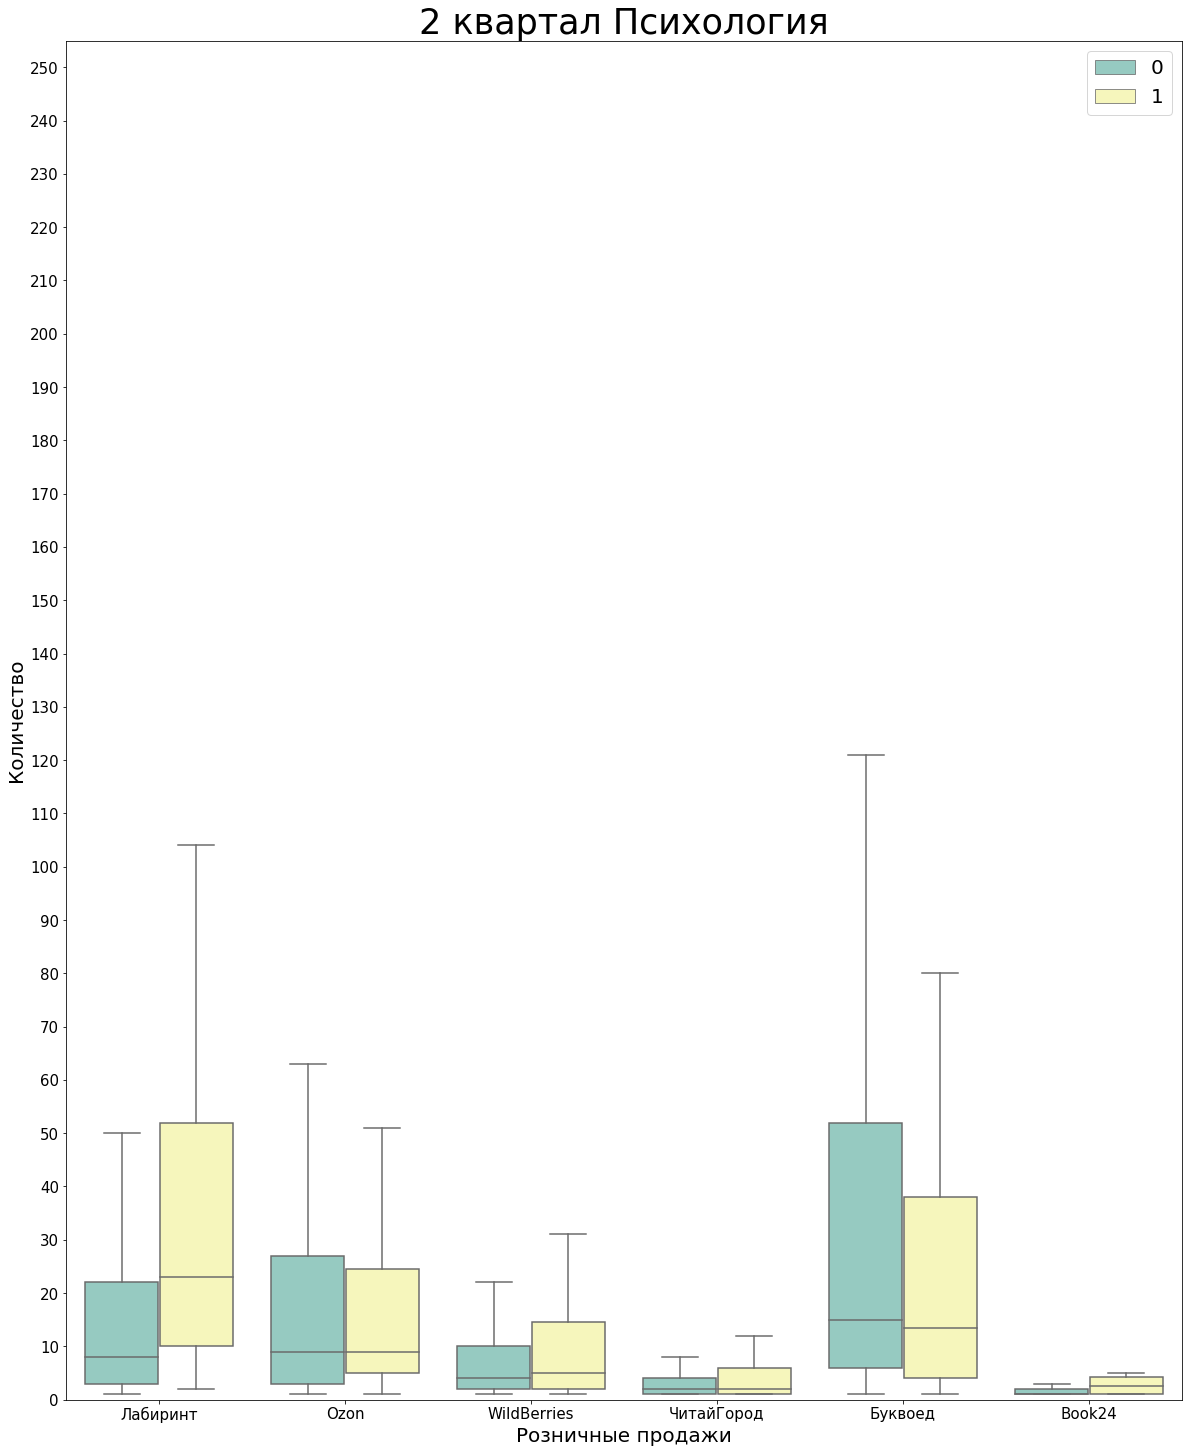

In [38]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = p2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Психология",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('p2.png', transparent = True)

In [39]:
tp2 = p2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tp2.to_excel('tp2.xlsx')

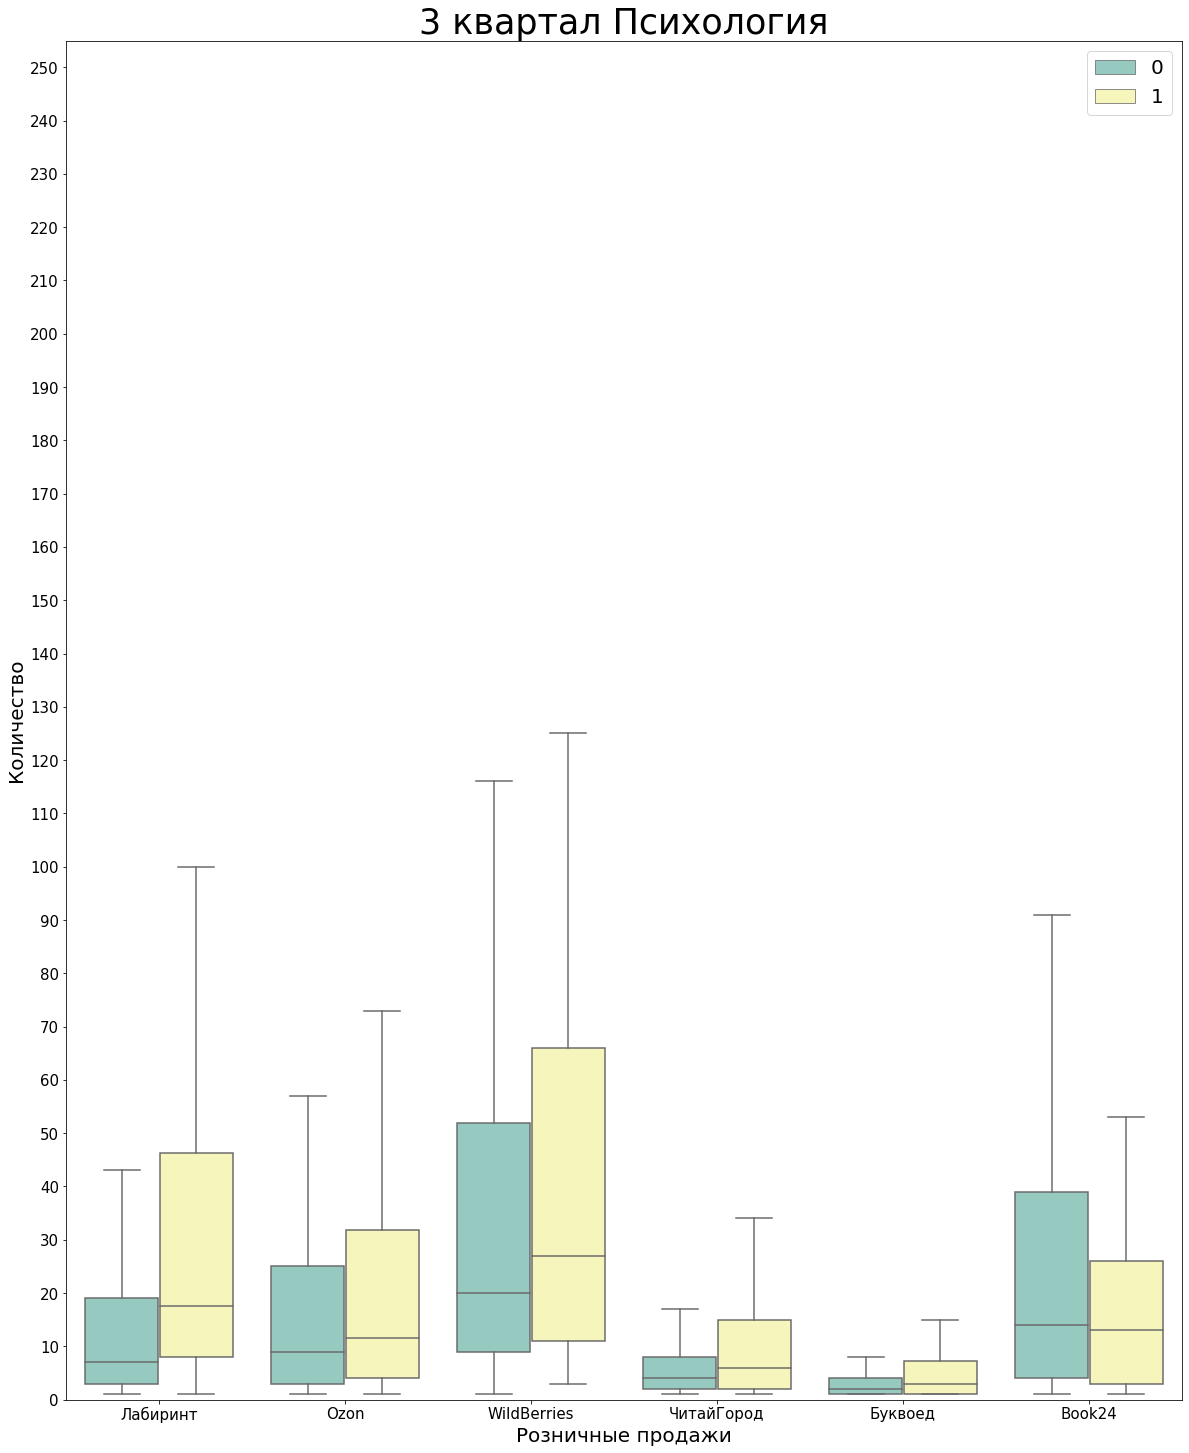

In [40]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = p3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Психология",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('p3.png', transparent = True)

In [41]:
tp3 = p3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tp3.to_excel('tp3.xlsx')

In [45]:
#медицина
m1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЗДОРОВЬЕ. ПОПУЛЯРНАЯ МЕДИЦИНА')]
m2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЗДОРОВЬЕ. ПОПУЛЯРНАЯ МЕДИЦИНА')]
m3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЗДОРОВЬЕ. ПОПУЛЯРНАЯ МЕДИЦИНА')]

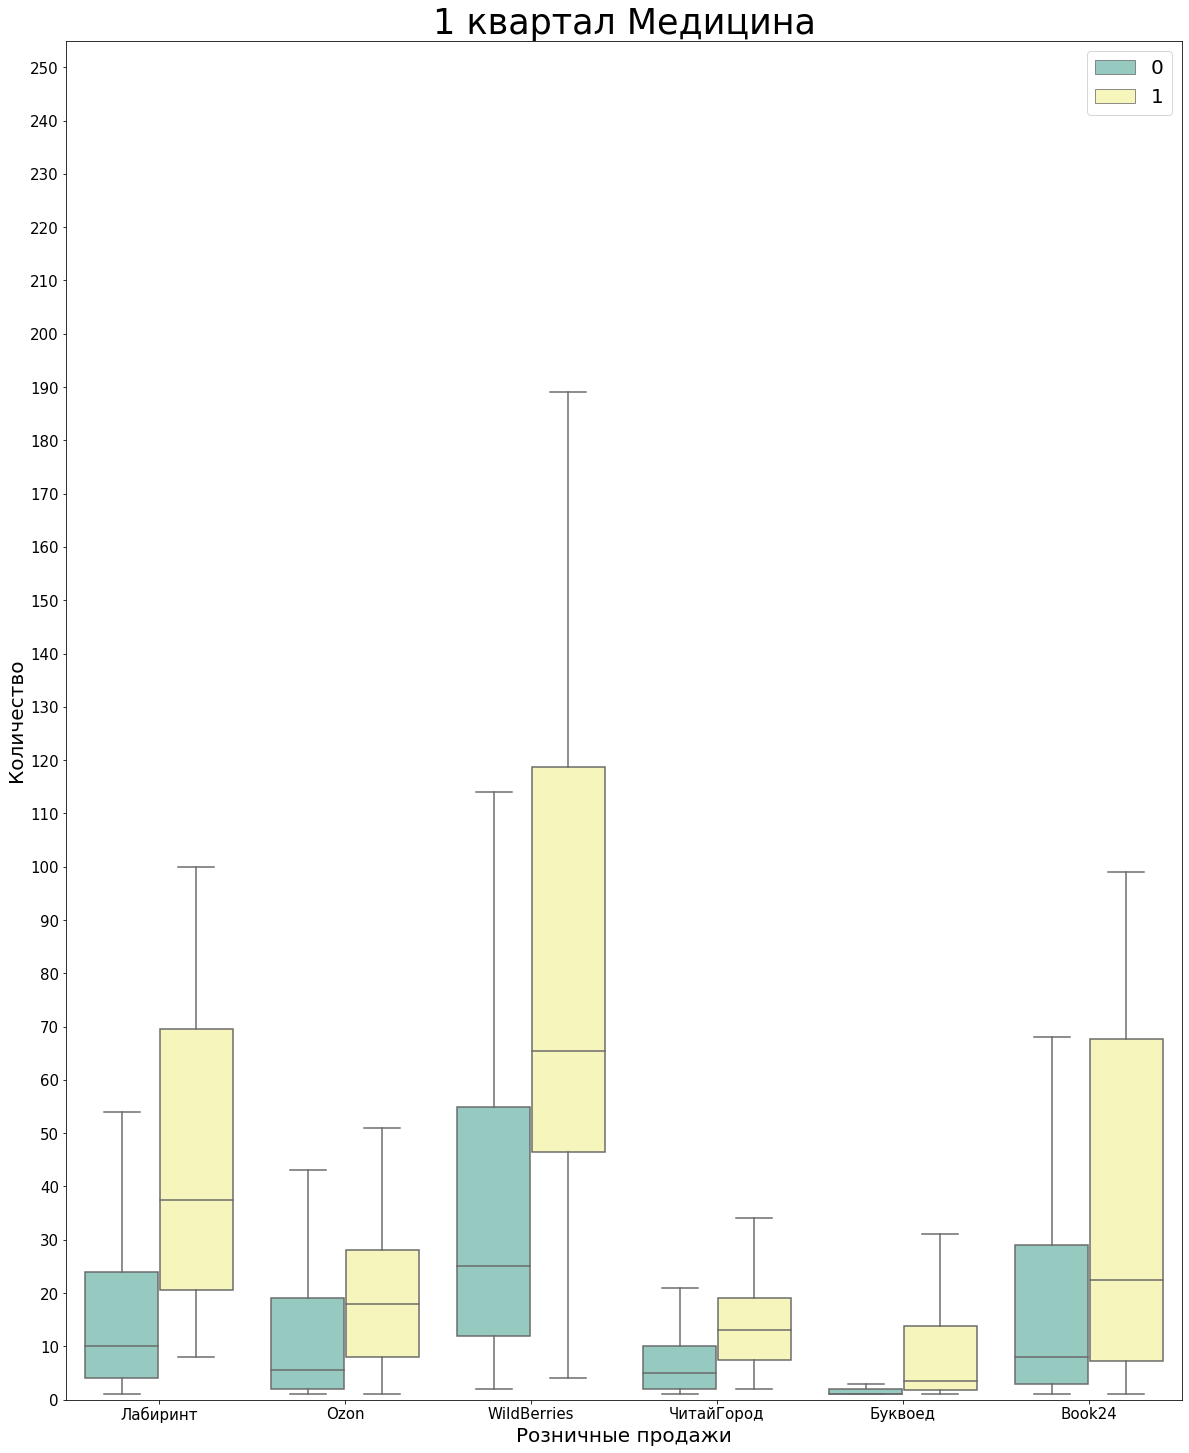

In [46]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = m1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Медицина",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('m1.png', transparent = True)

In [47]:
tm1 = m1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tm1.to_excel('tm1.xlsx')

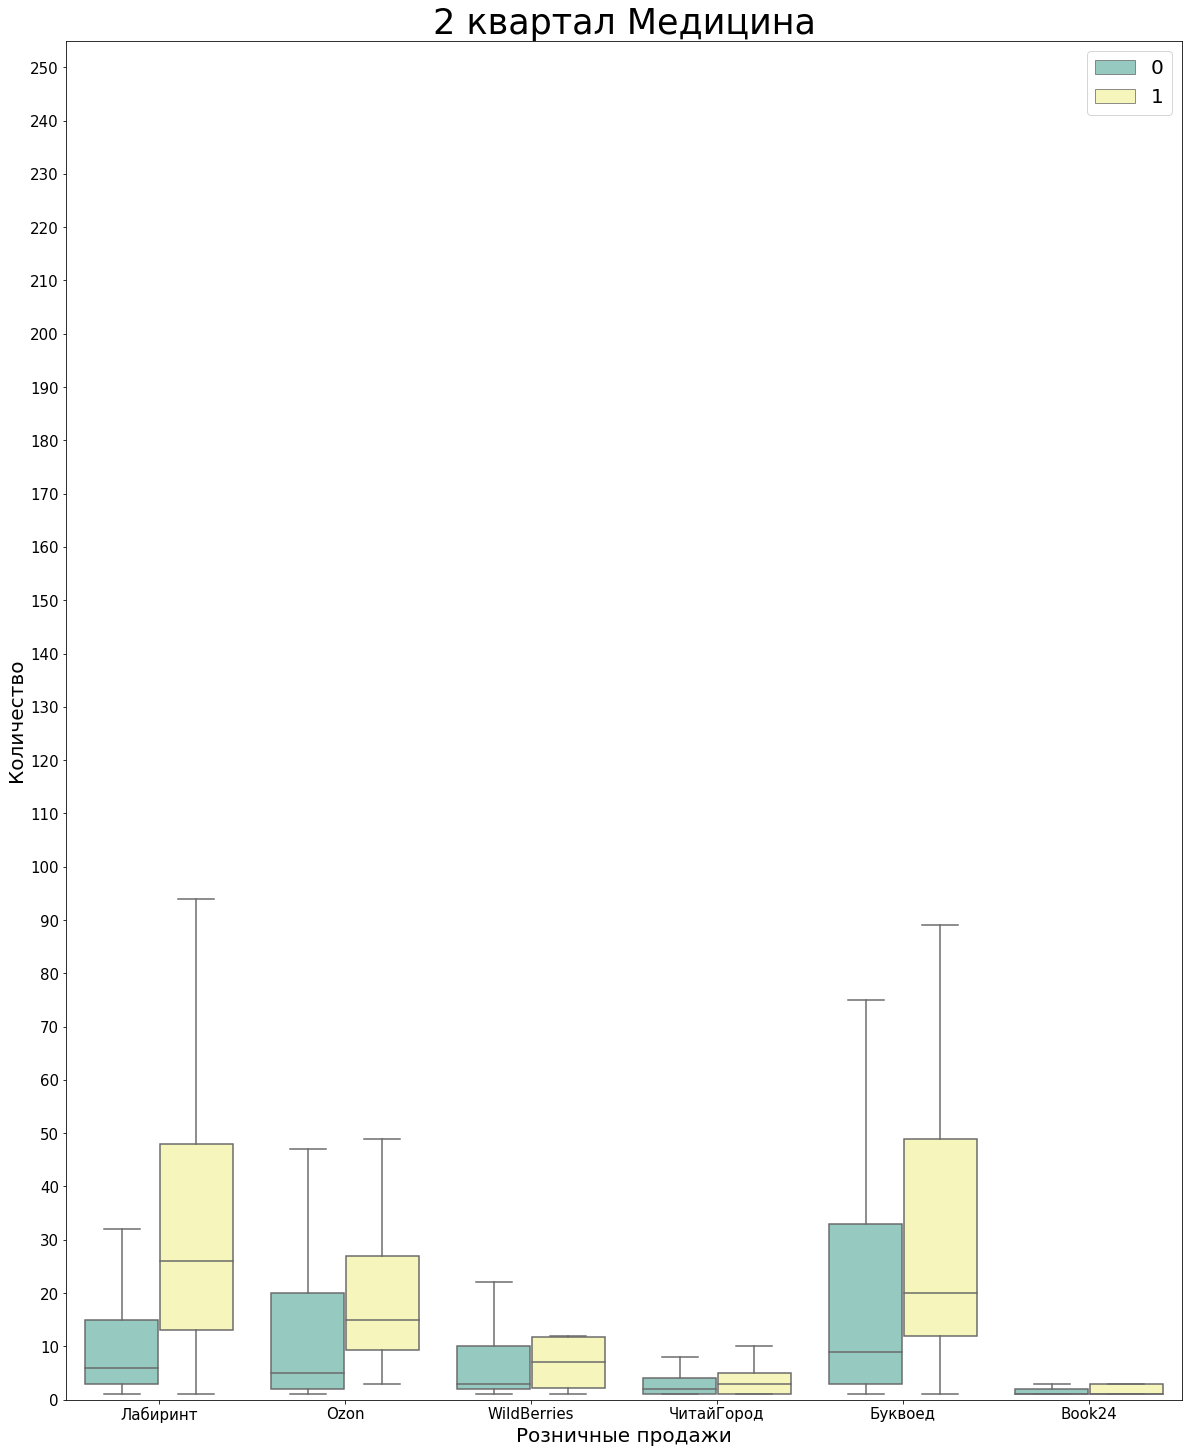

In [48]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = m2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Медицина",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('m2.png', transparent = True)

In [49]:
tm2 = m2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tm2.to_excel('tm2.xlsx')

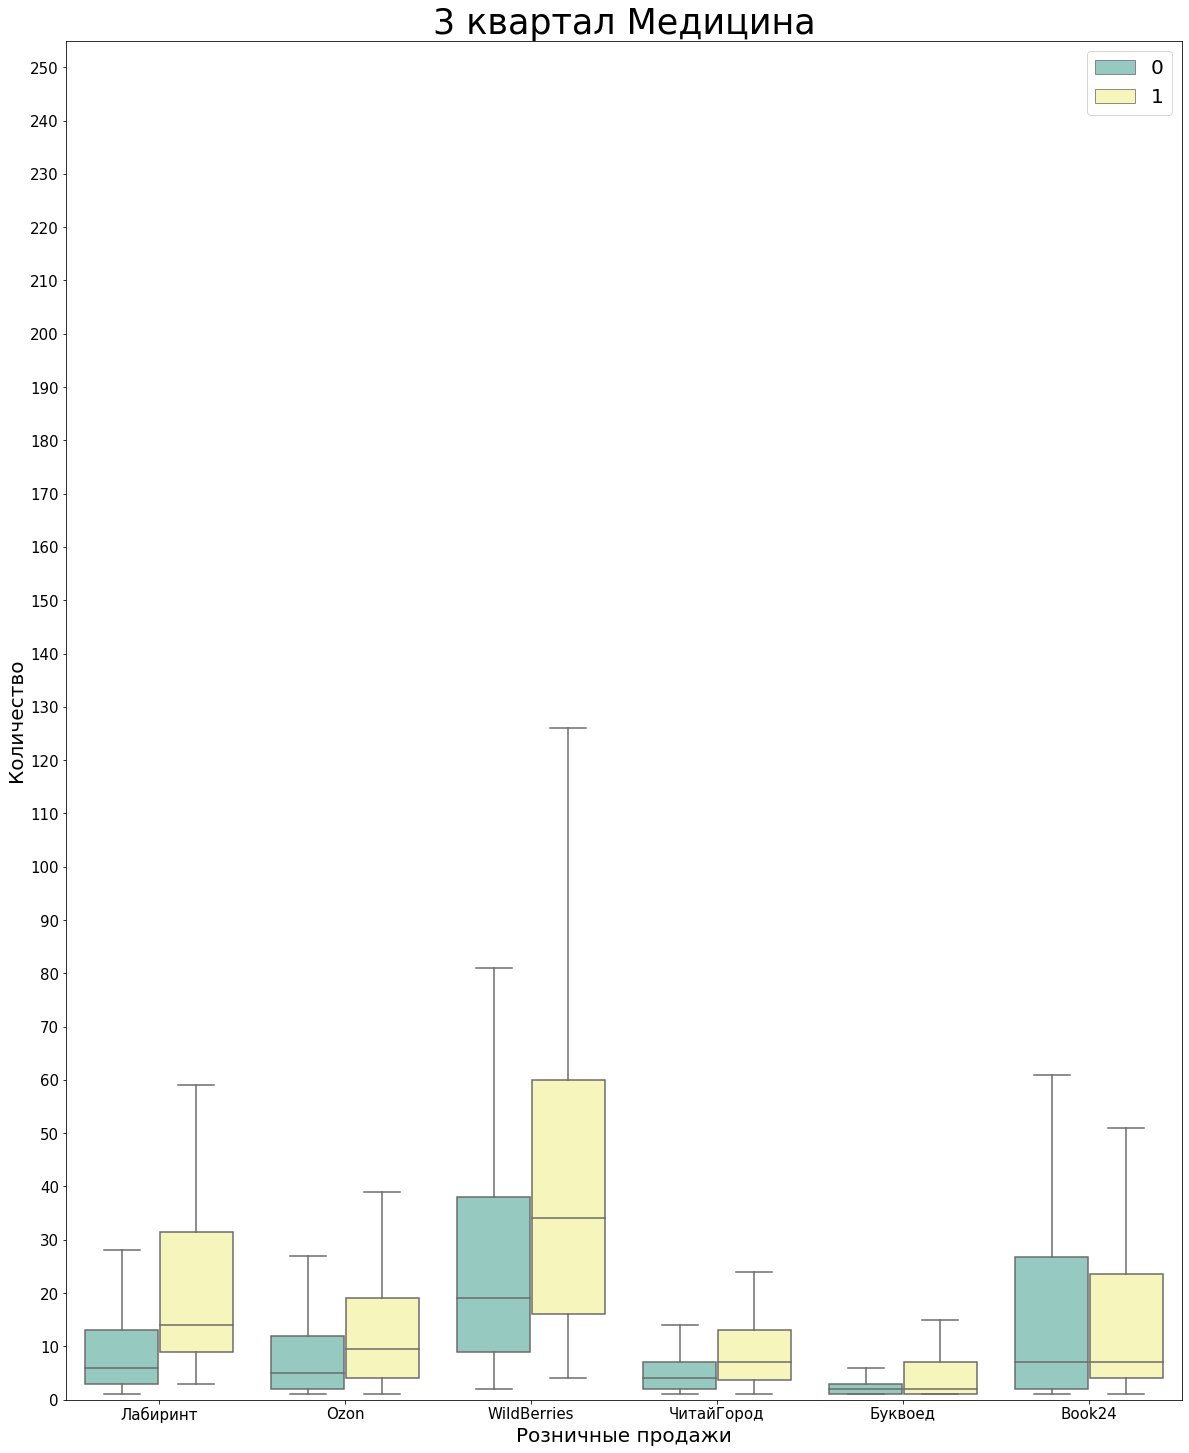

In [50]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = m3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Медицина",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('m3.png', transparent = True)

In [51]:
tm3 = m3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tm3.to_excel('tm3.xlsx')

In [53]:
#культура
c1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСКУССТВО. КУЛЬТУРА')]
c2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСКУССТВО. КУЛЬТУРА')]
c3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСКУССТВО. КУЛЬТУРА')]

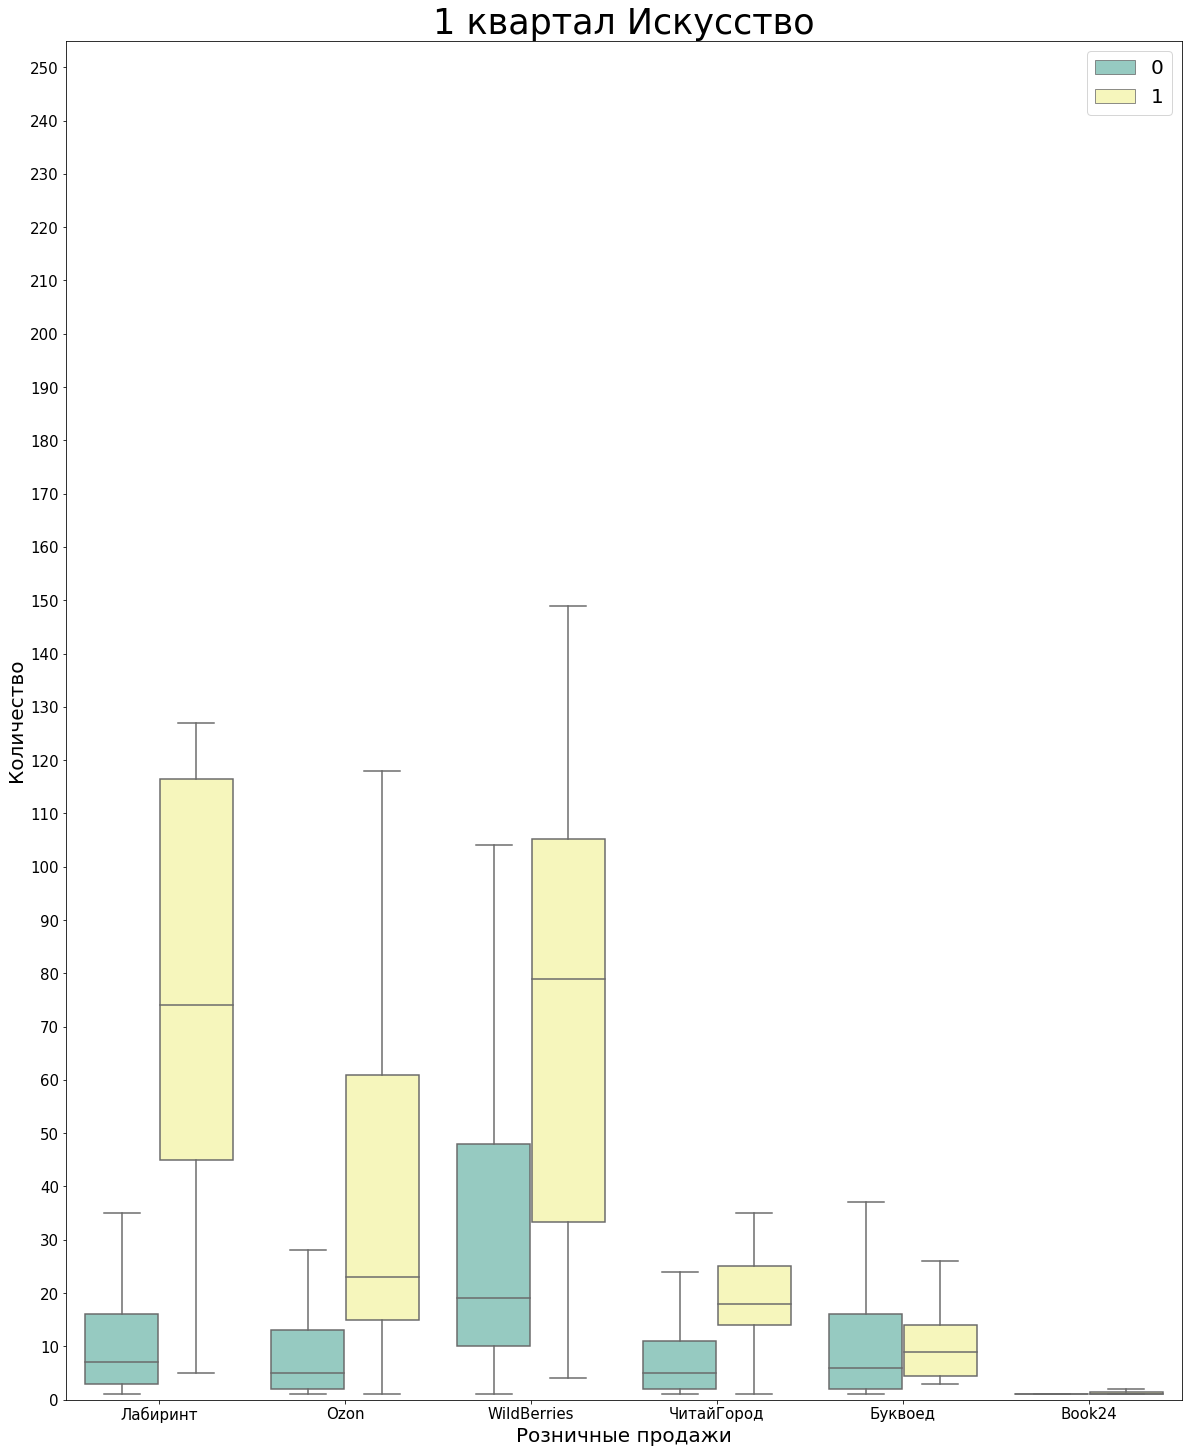

In [54]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = c1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Искусство",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('c1.png', transparent = True)

tc1 = c1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tc1.to_excel('tc1.xlsx')

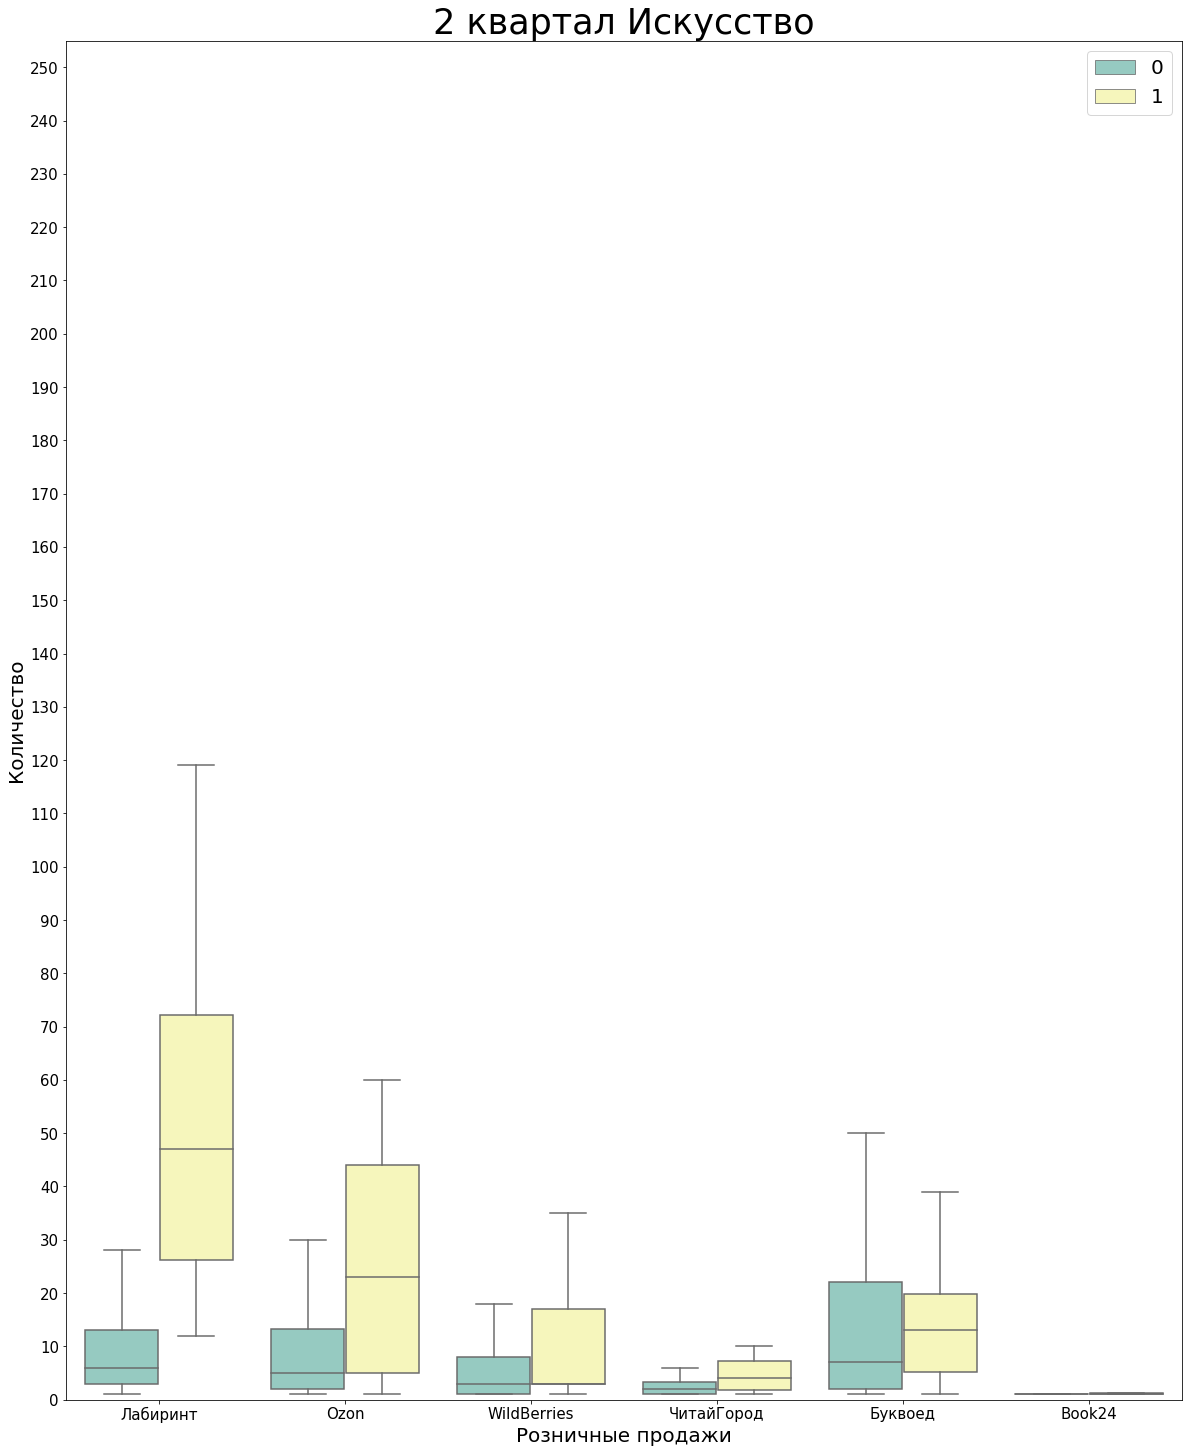

In [55]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = c2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Искусство",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('c2.png', transparent = True)

tc2 = c2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tc2.to_excel('tc2.xlsx')

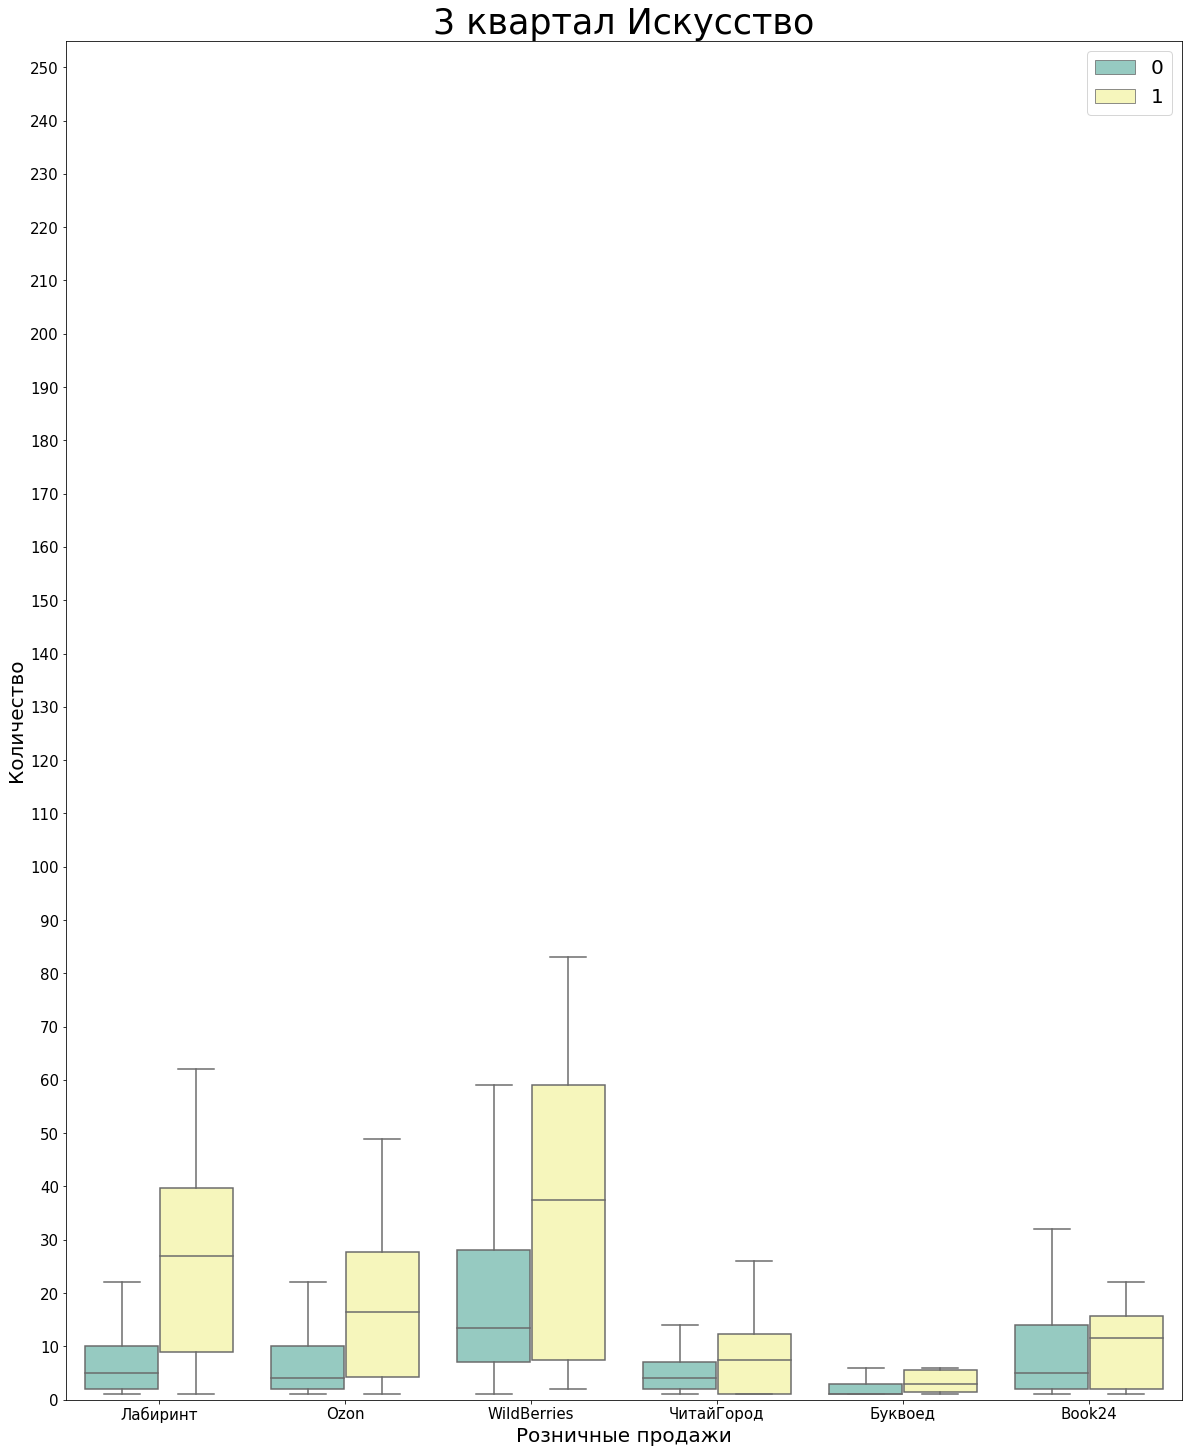

In [56]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = c3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Искусство",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('c3.png', transparent = True)

tc3 = c3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tc3.to_excel('tc3.xlsx')

In [59]:
l1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИНОСТРАННЫЕ ЯЗЫКИ')]
l2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИНОСТРАННЫЕ ЯЗЫКИ')]
l3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИНОСТРАННЫЕ ЯЗЫКИ')]

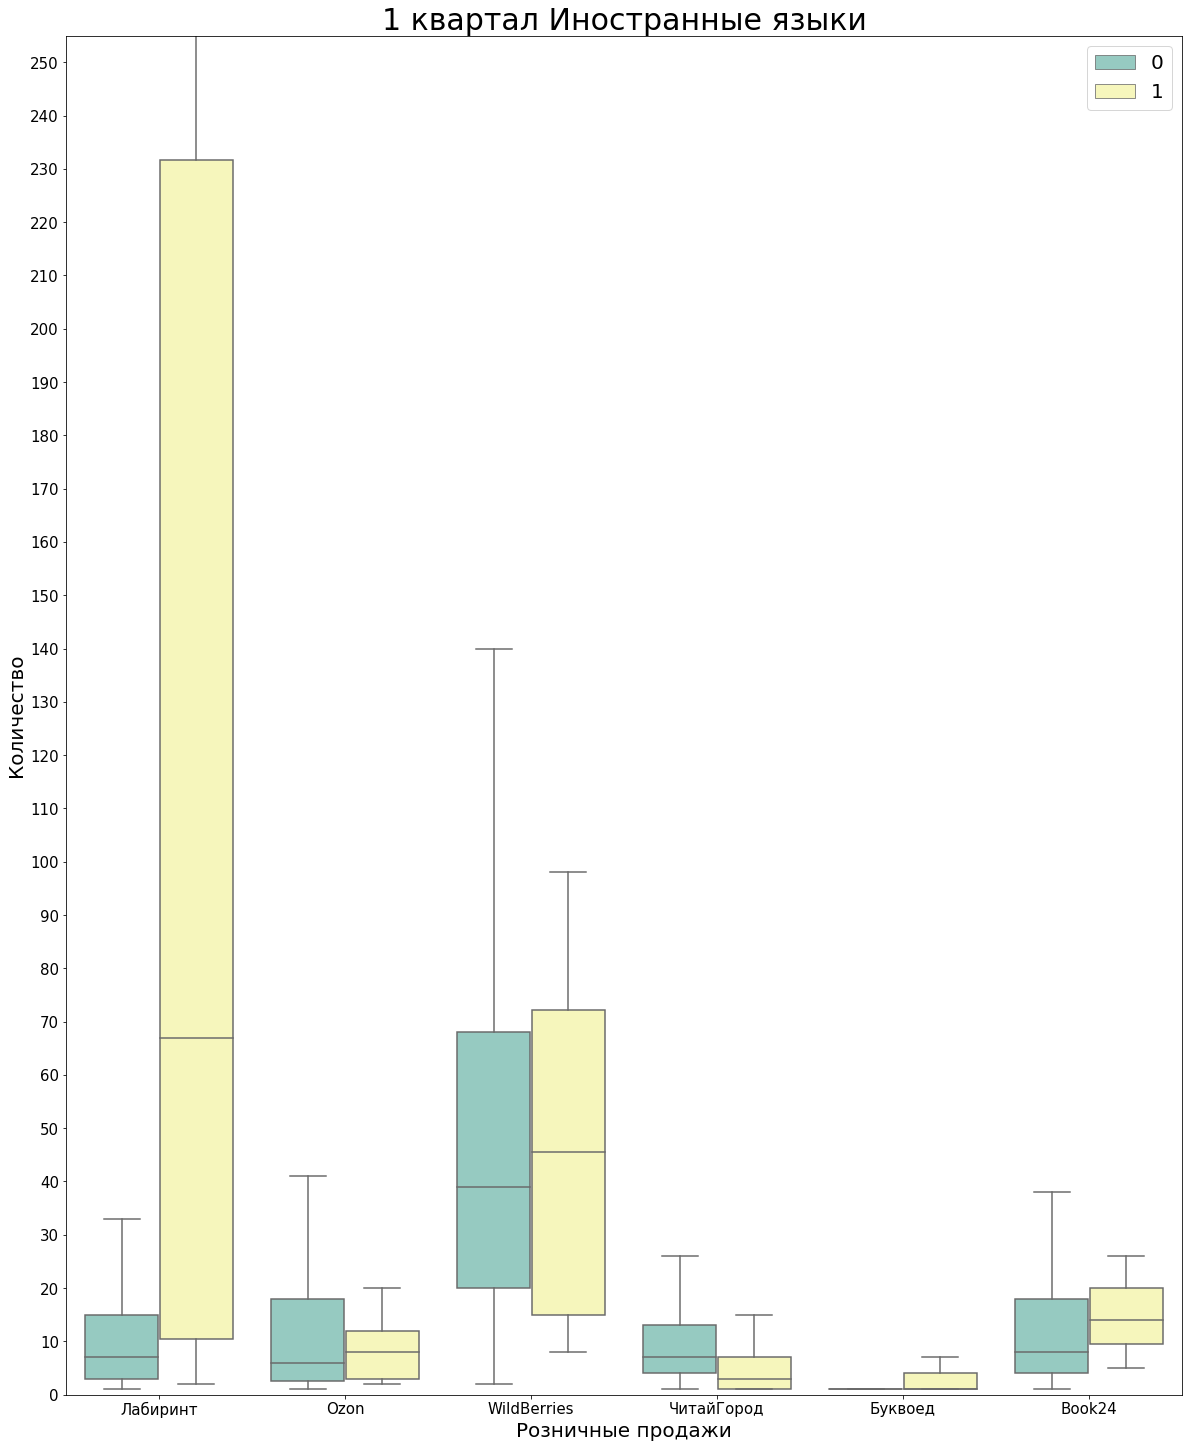

In [60]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = l1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Иностранные языки",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('l1.png', transparent = True)

tl1 = l1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tl1.to_excel('tl1.xlsx')

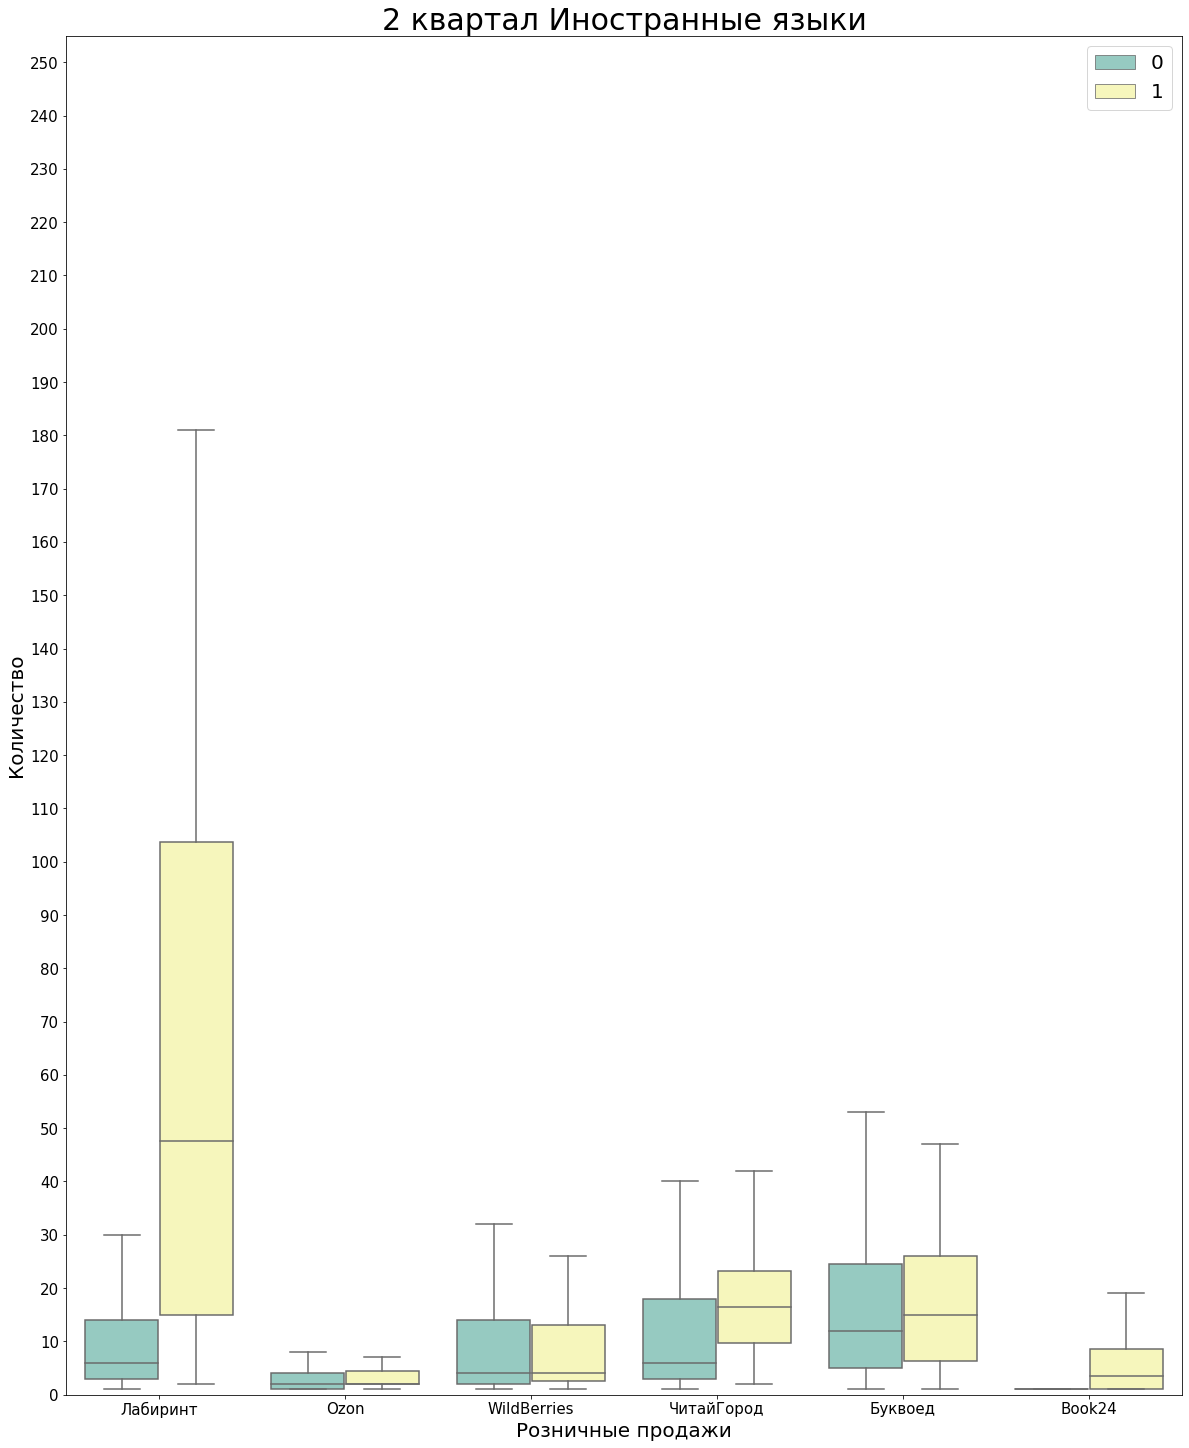

In [61]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = l2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Иностранные языки",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('l2.png', transparent = True)

tl2 = l2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tl2.to_excel('tl2.xlsx')

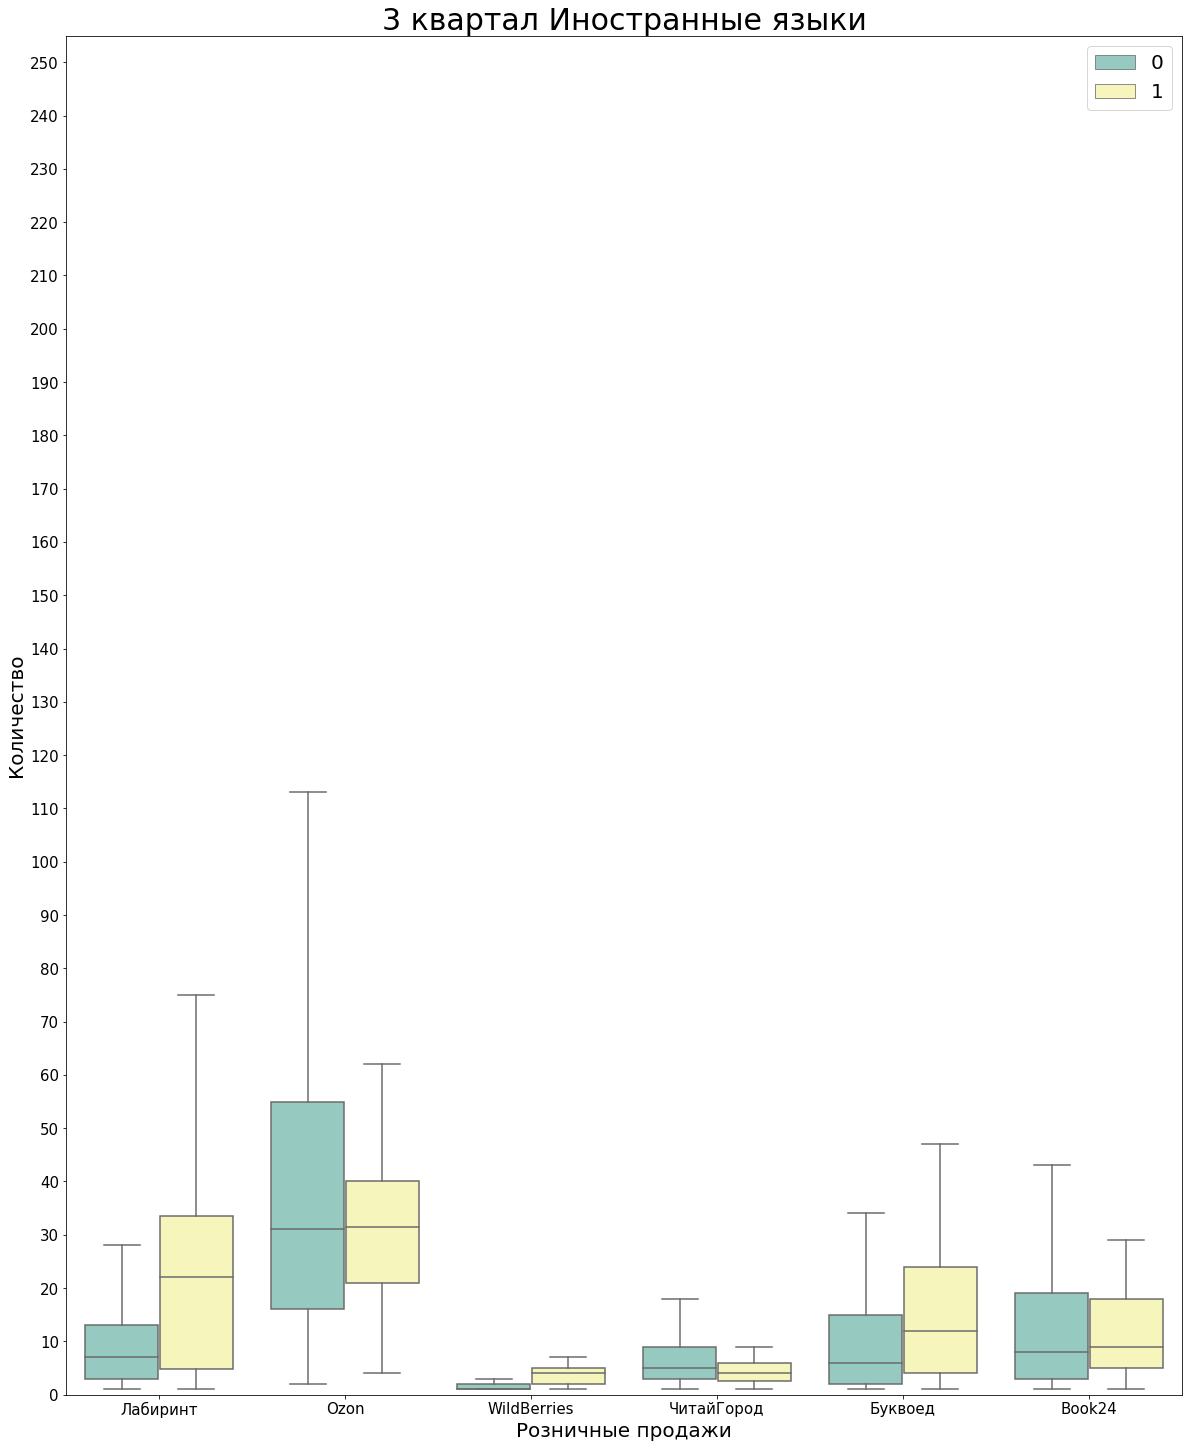

In [62]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = l3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Иностранные языки",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('l3.png', transparent = True)

tl3 = l3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tl3.to_excel('tl3.xlsx')

In [63]:
po1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОЭЗИЯ')]
po2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОЭЗИЯ')]
po3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ПОЭЗИЯ')]

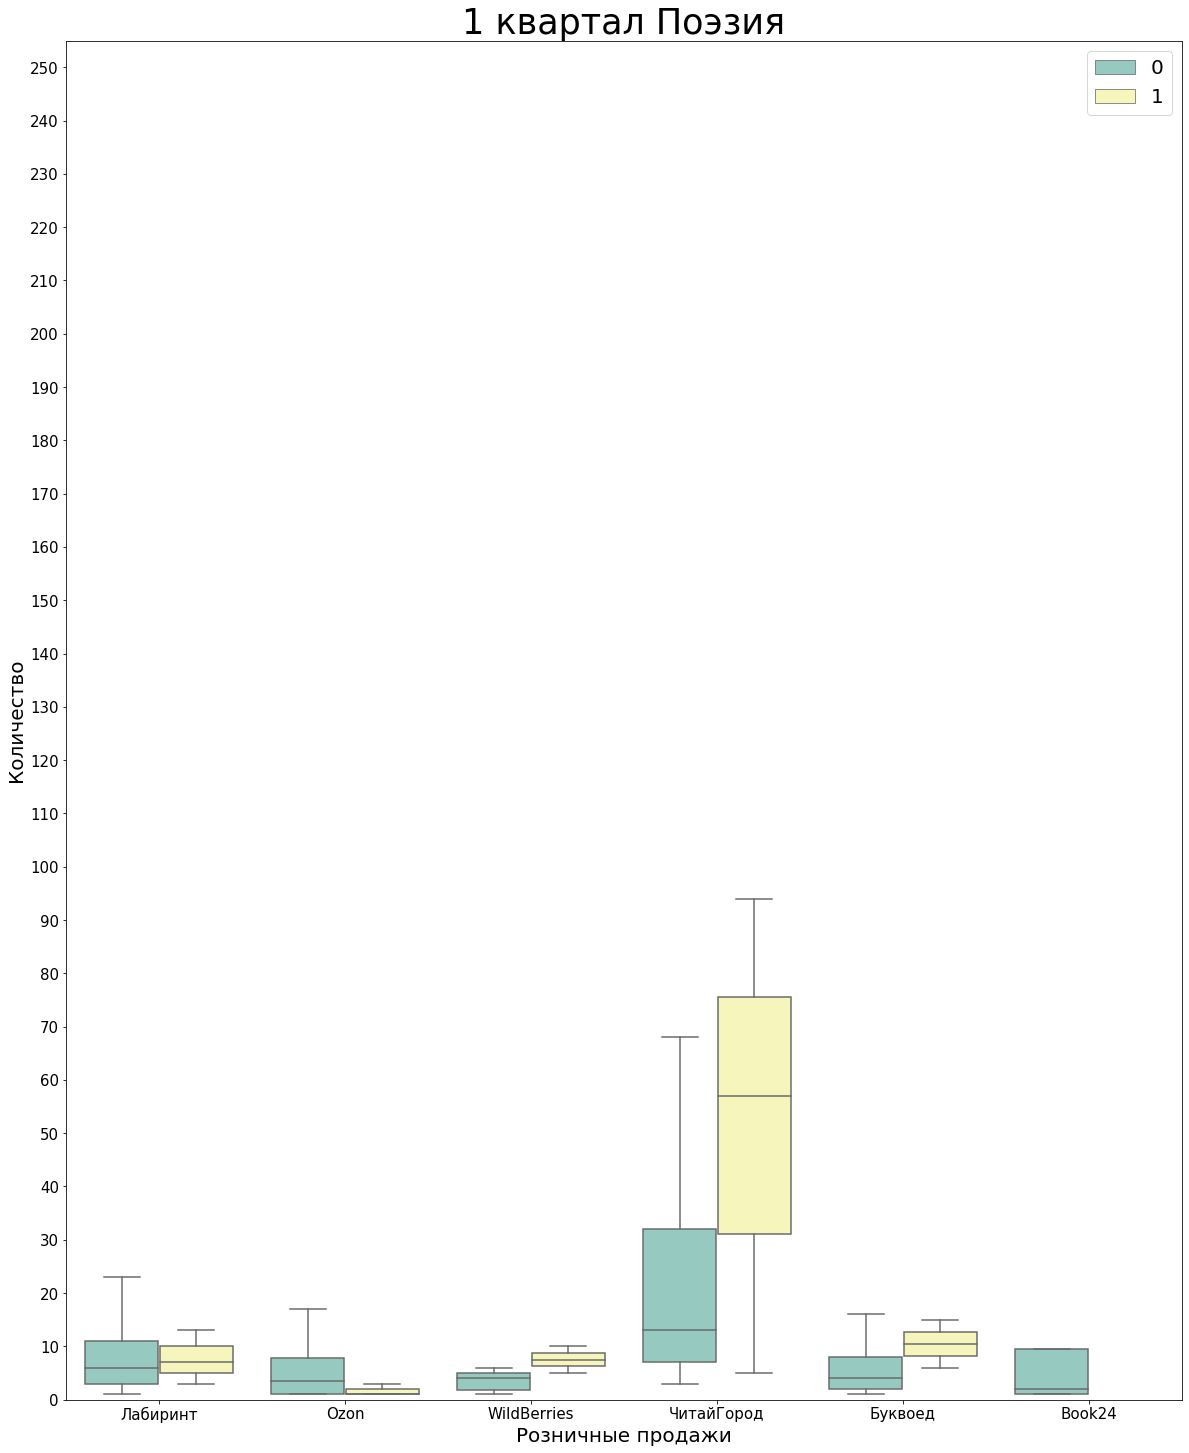

In [64]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = po1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Поэзия",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('po1.png', transparent = True)

tpo1 = po1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tpo1.to_excel('tpo1.xlsx')

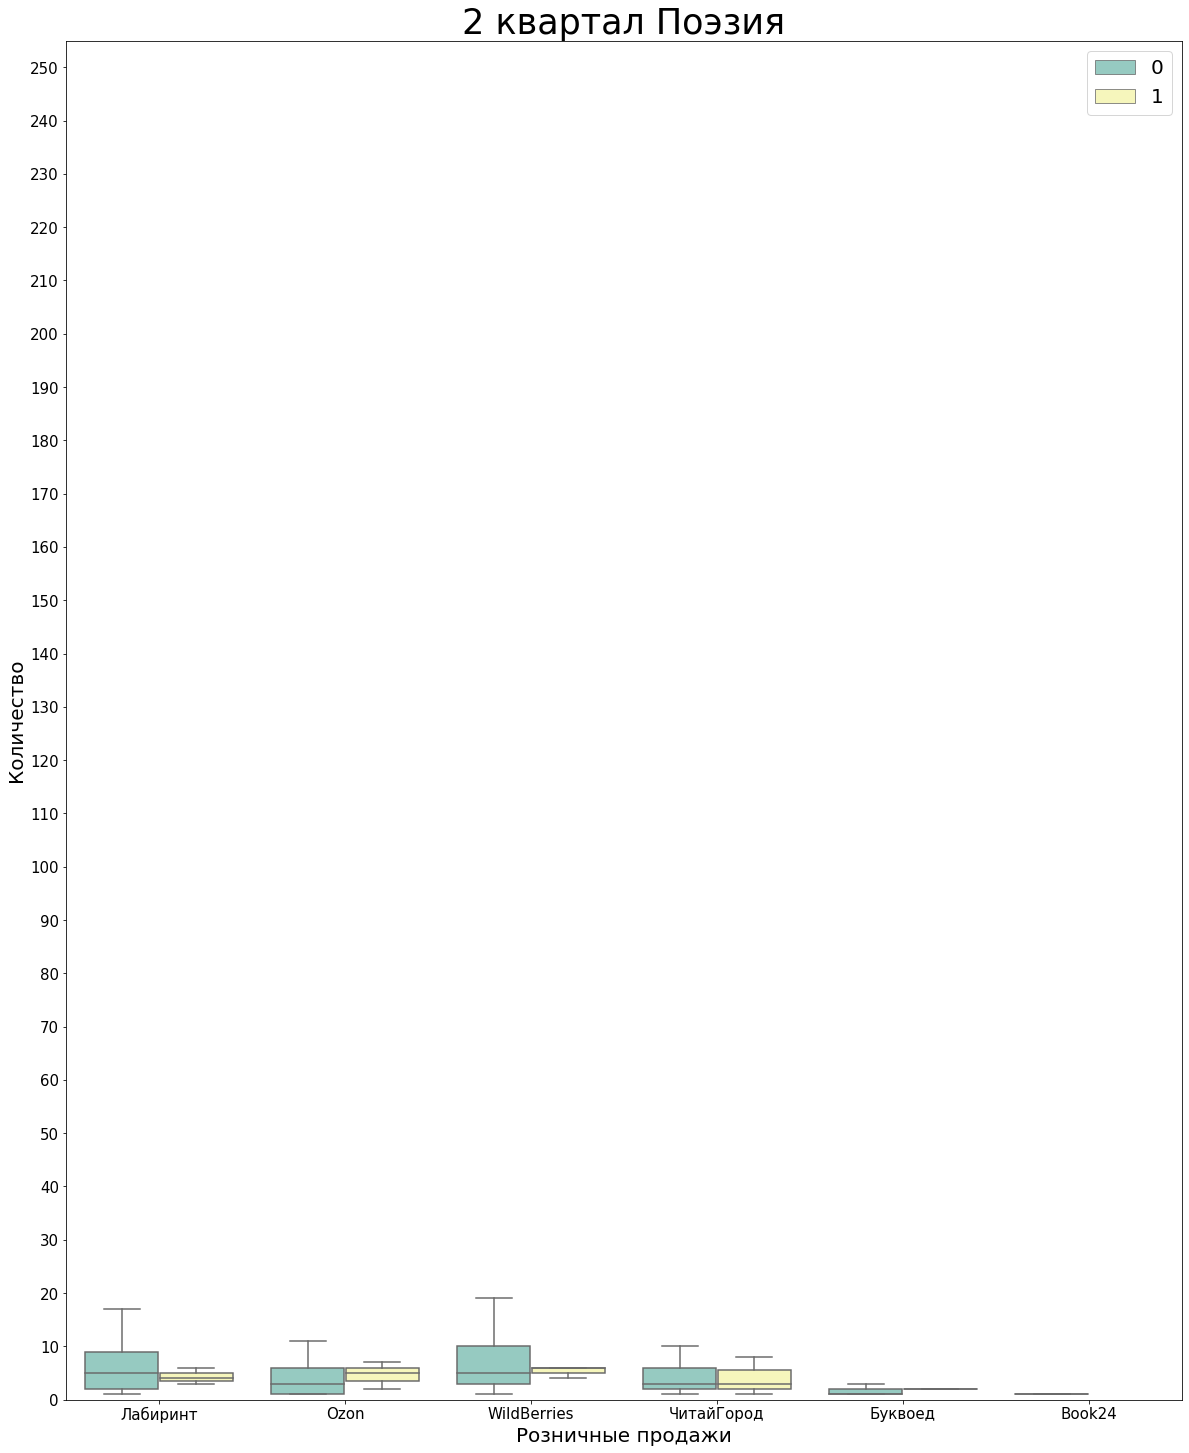

In [65]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = po2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Поэзия",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('po2.png', transparent = True)

tpo2 = po2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tpo2.to_excel('tpo2.xlsx')

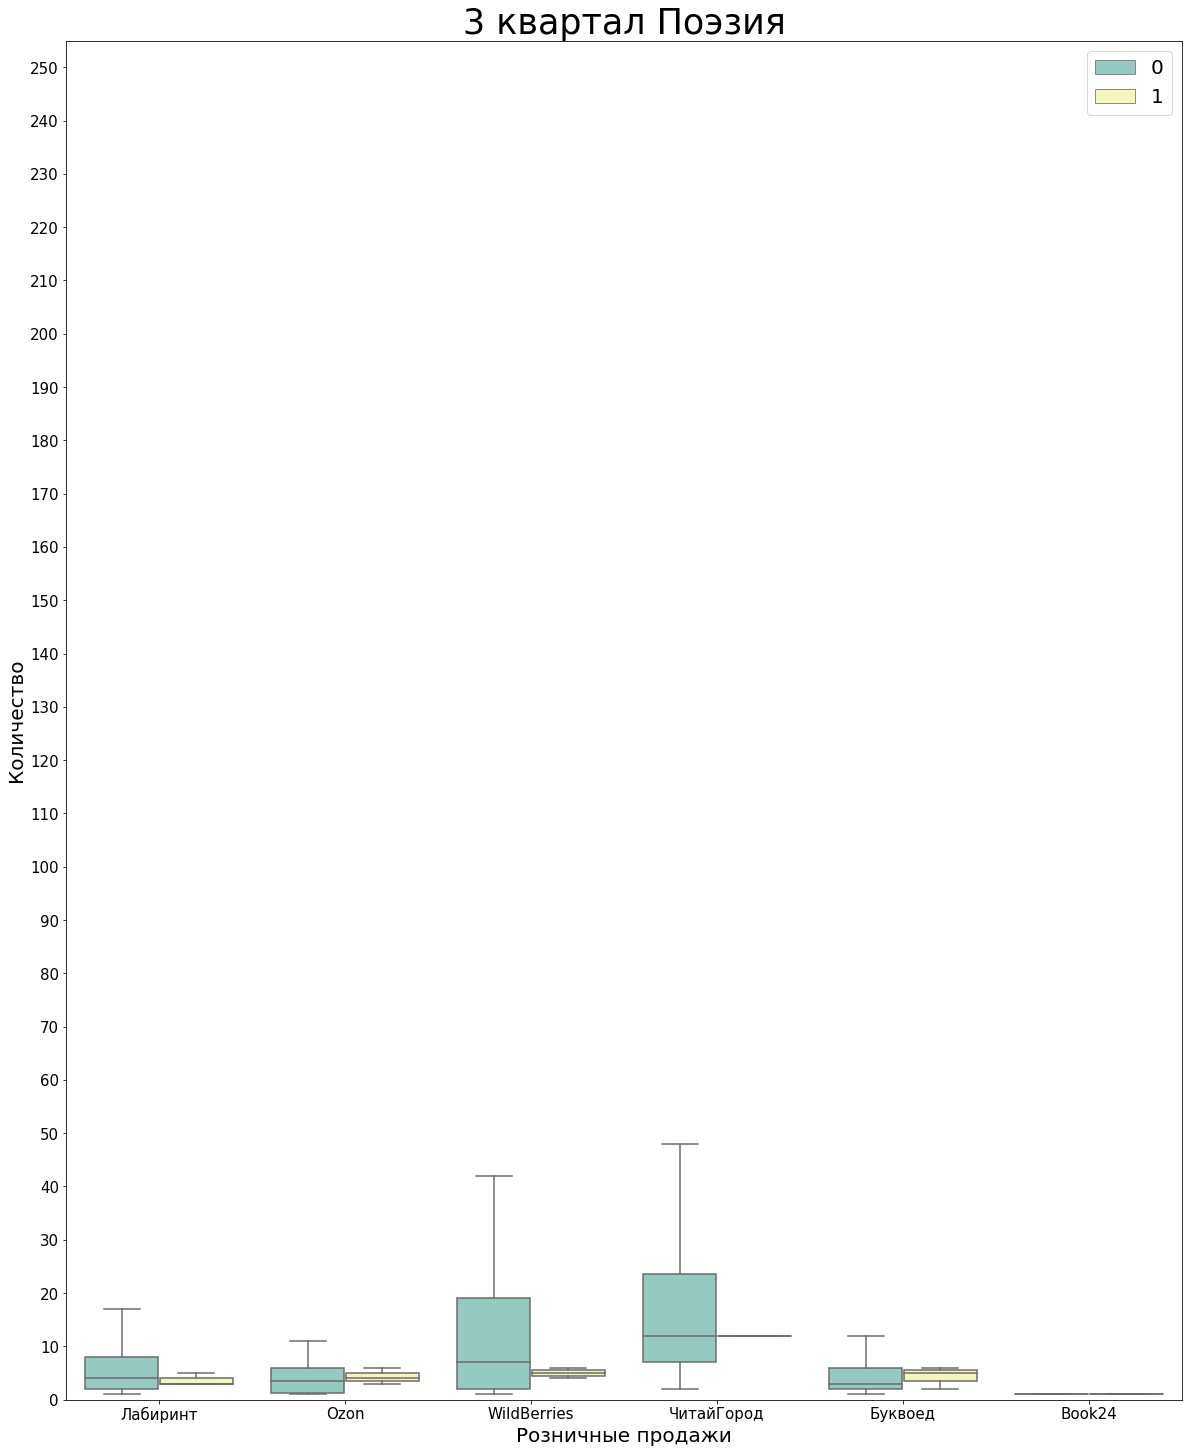

In [66]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = po3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Поэзия",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('po3.png', transparent = True)

tpo3 = po3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tpo3.to_excel('tpo3.xlsx')

In [67]:
b1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'БИОГРАФИИ. МЕМУАРЫ')]
b2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'БИОГРАФИИ. МЕМУАРЫ')]
b3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'БИОГРАФИИ. МЕМУАРЫ')]

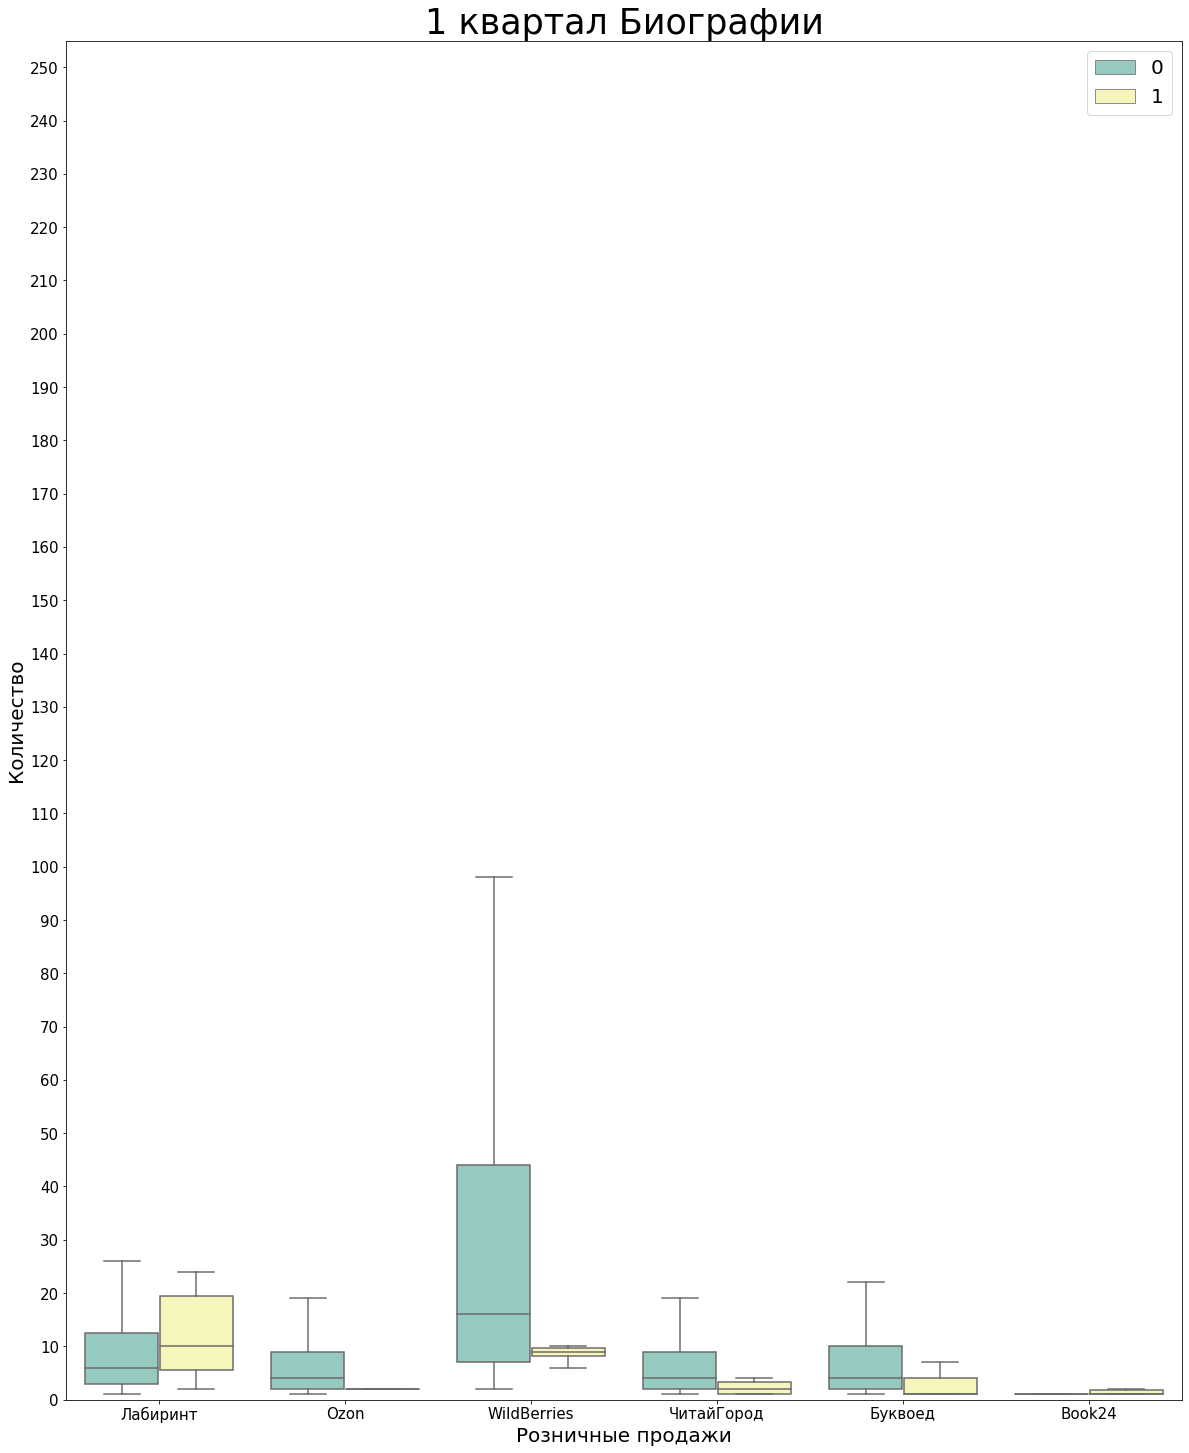

In [68]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = b1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Биографии",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('b1.png', transparent = True)

tb1 = b1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tb1.to_excel('tb1.xlsx')

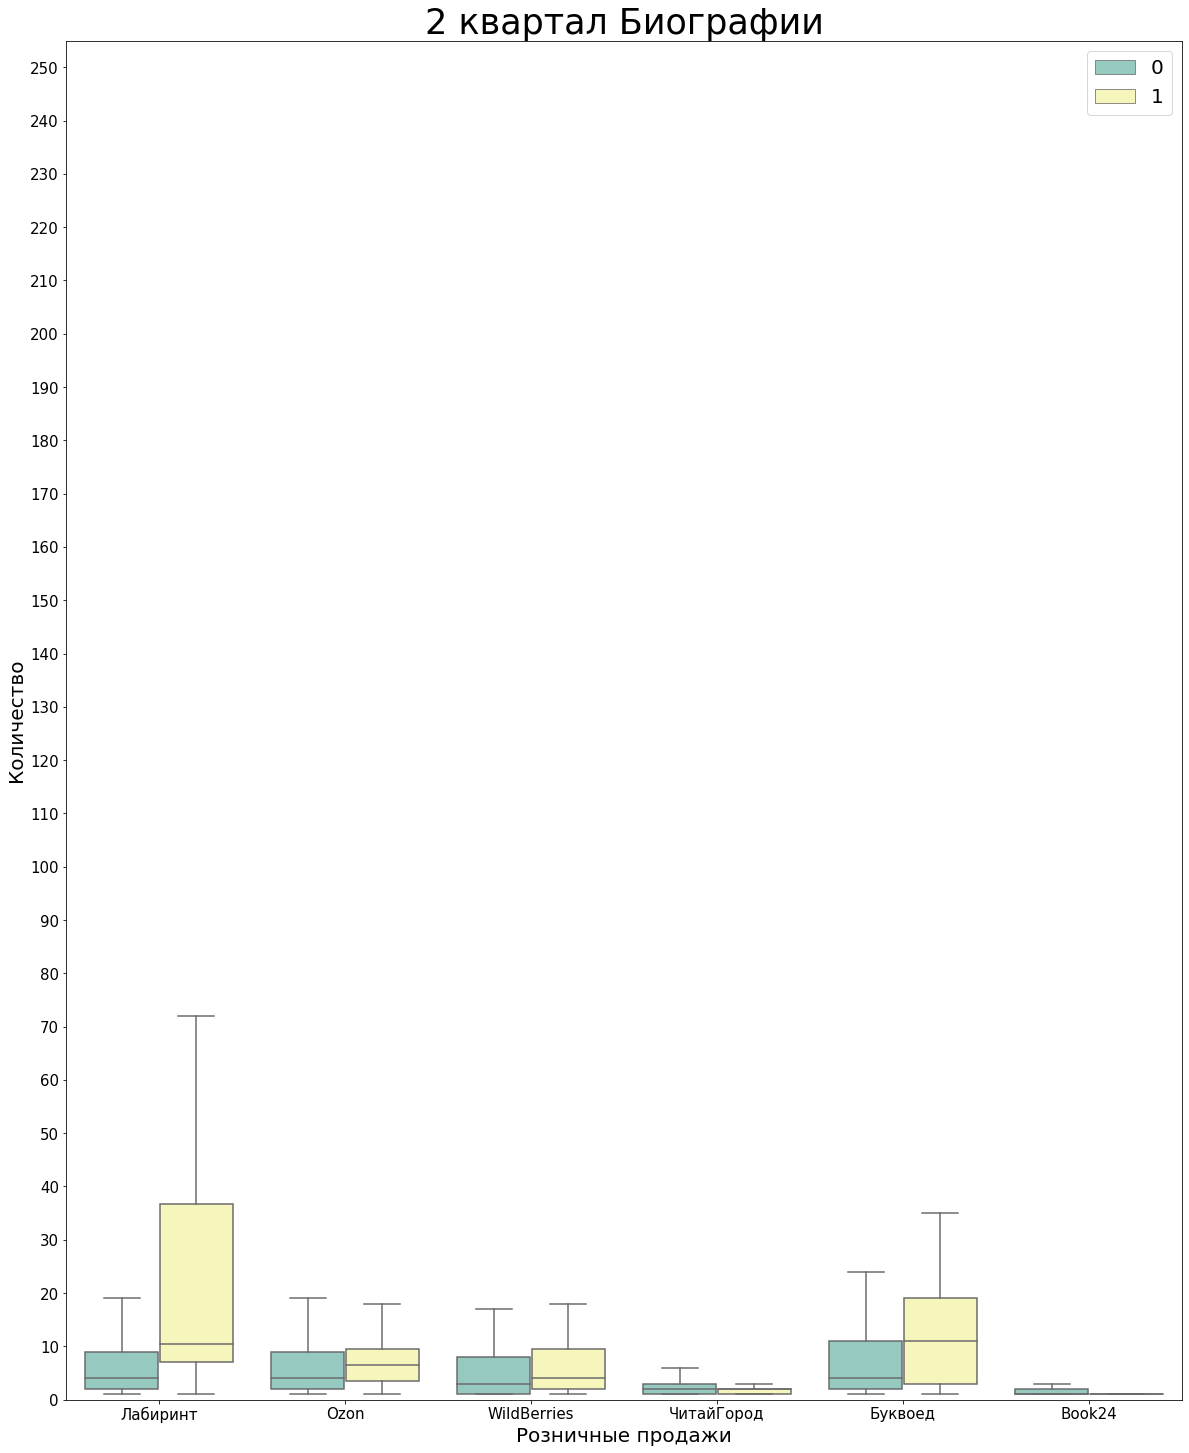

In [69]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = b2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Биографии",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('b2.png', transparent = True)

tb2 = b2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tb2.to_excel('tb2.xlsx')

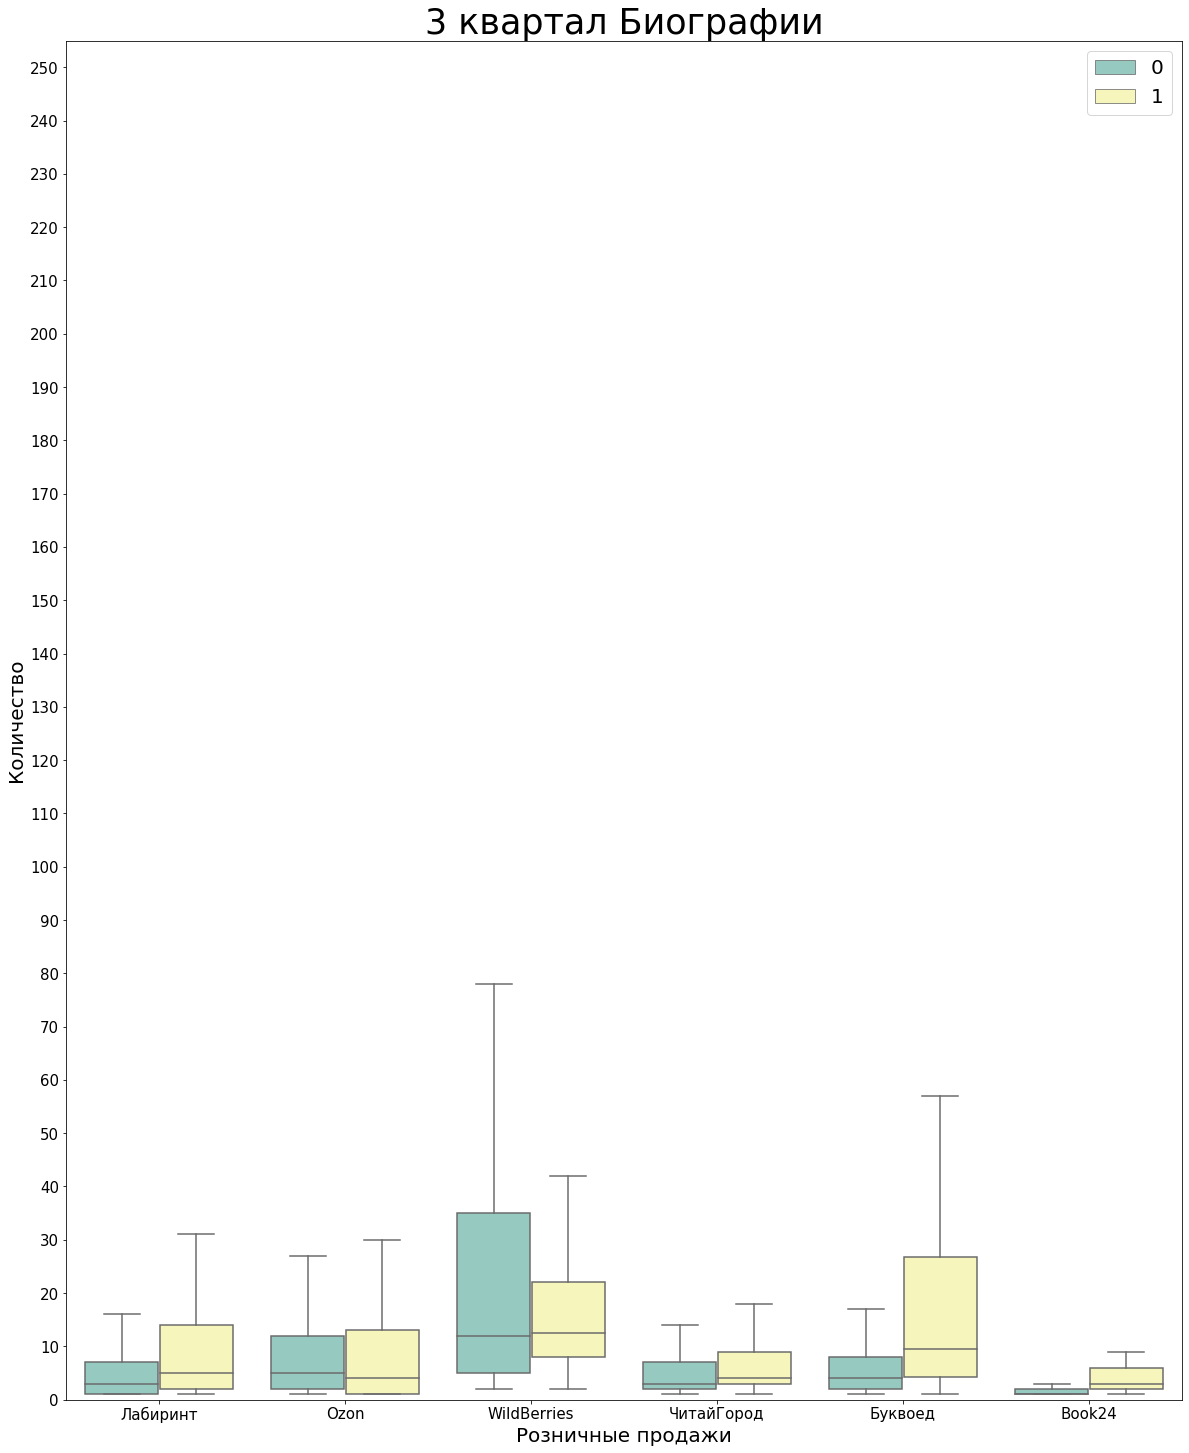

In [70]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = b3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Биографии",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('b3.png', transparent = True)

tb3 = b3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tb3.to_excel('tb3.xlsx')

In [72]:
es1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭЗОТЕРИКА. САМОПОЗНАНИЕ. ТАЙНЫЕ ЯВЛЕНИЯ')]
es2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭЗОТЕРИКА. САМОПОЗНАНИЕ. ТАЙНЫЕ ЯВЛЕНИЯ')]
es3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭЗОТЕРИКА. САМОПОЗНАНИЕ. ТАЙНЫЕ ЯВЛЕНИЯ')]

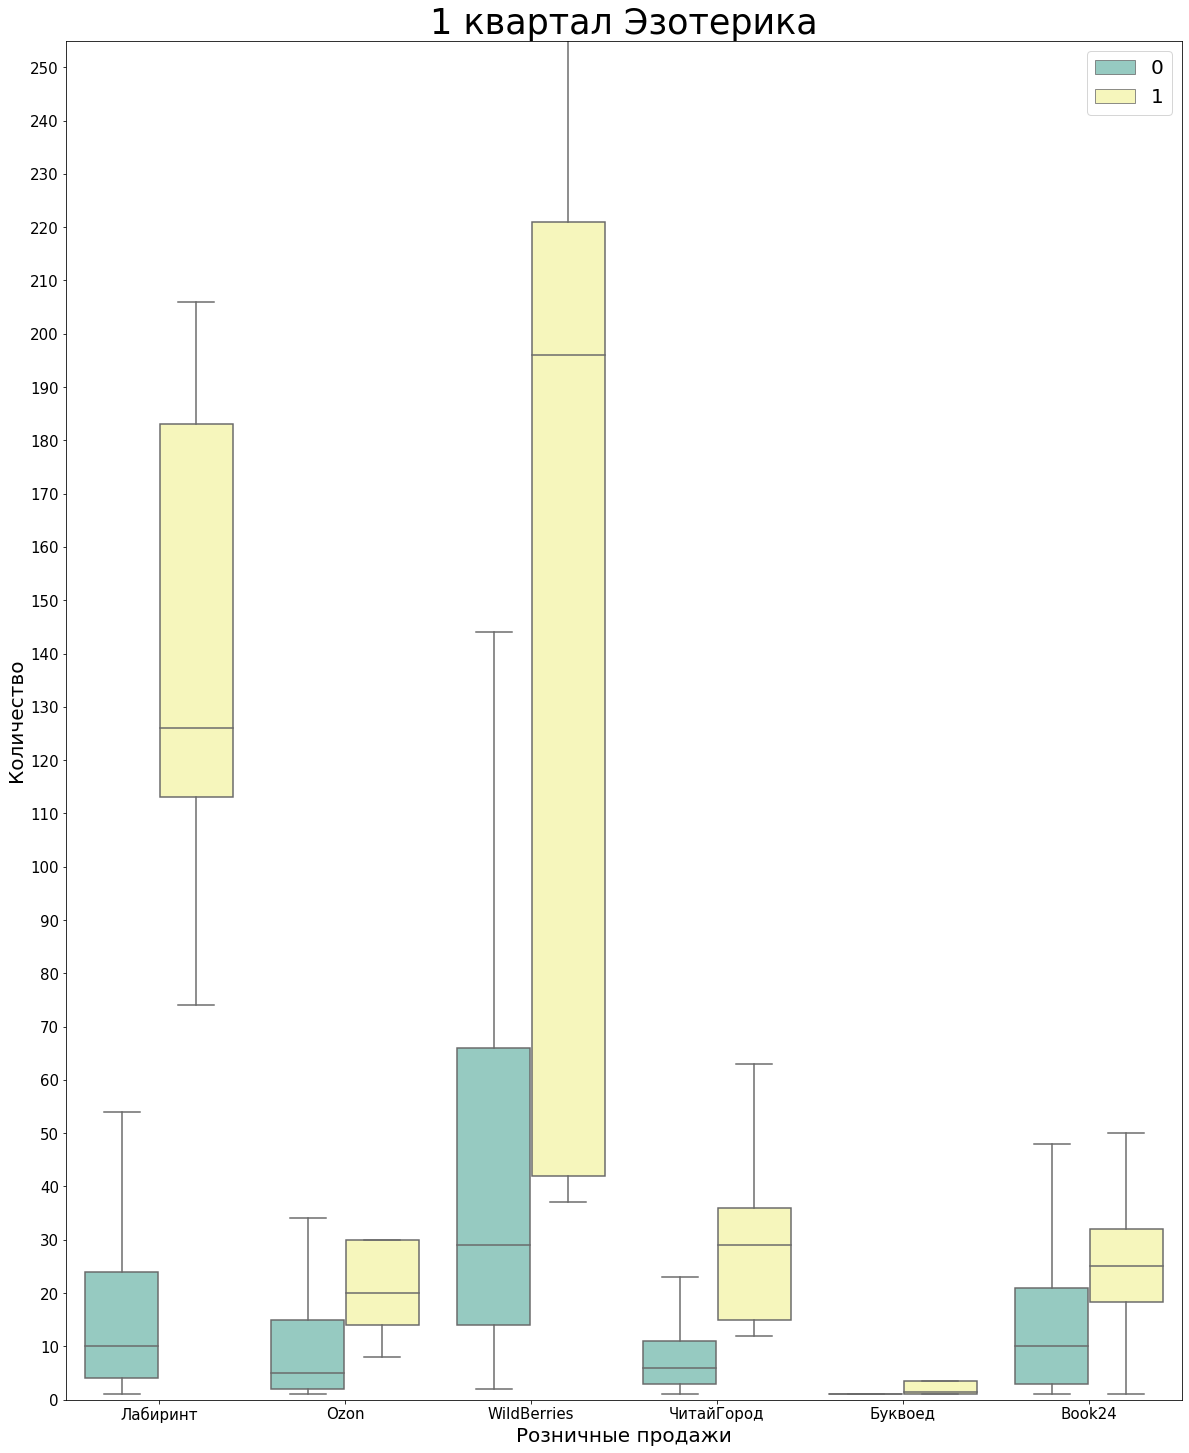

In [79]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = es1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Эзотерика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('es1.png', transparent = True)

tes1 = es1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tes1.to_excel('tes1.xlsx')

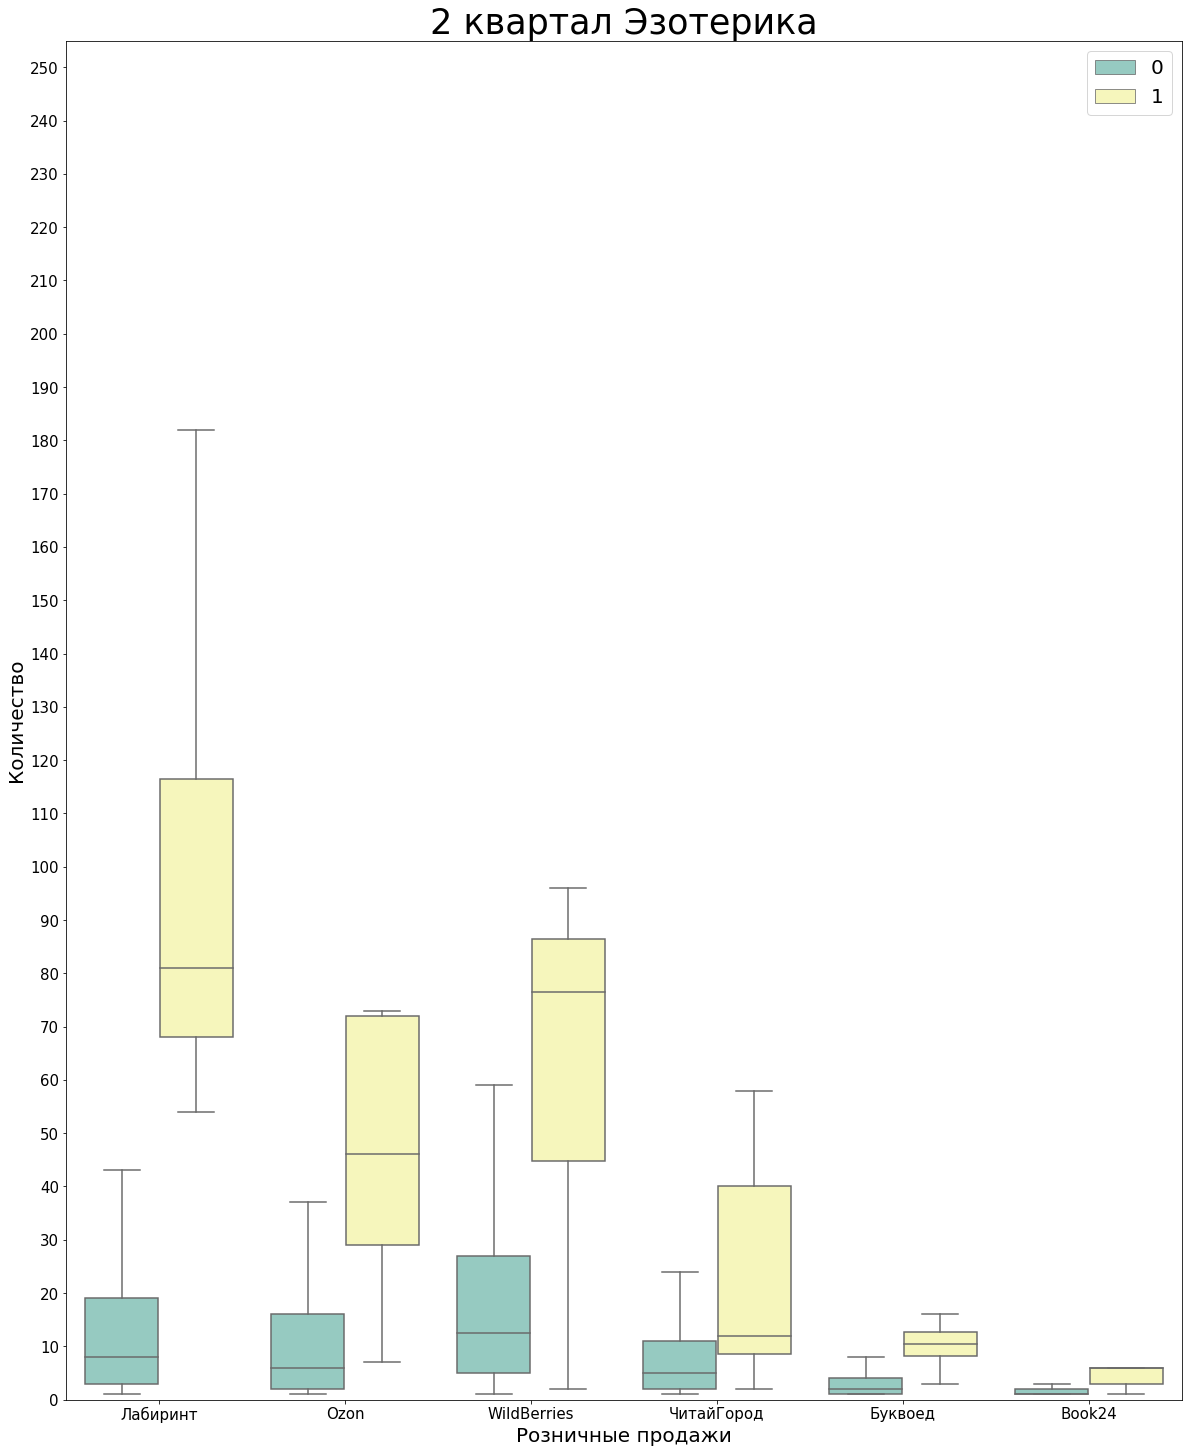

In [80]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = es2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Эзотерика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('es2.png', transparent = True)

tes2 = es2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tes2.to_excel('tes2.xlsx')

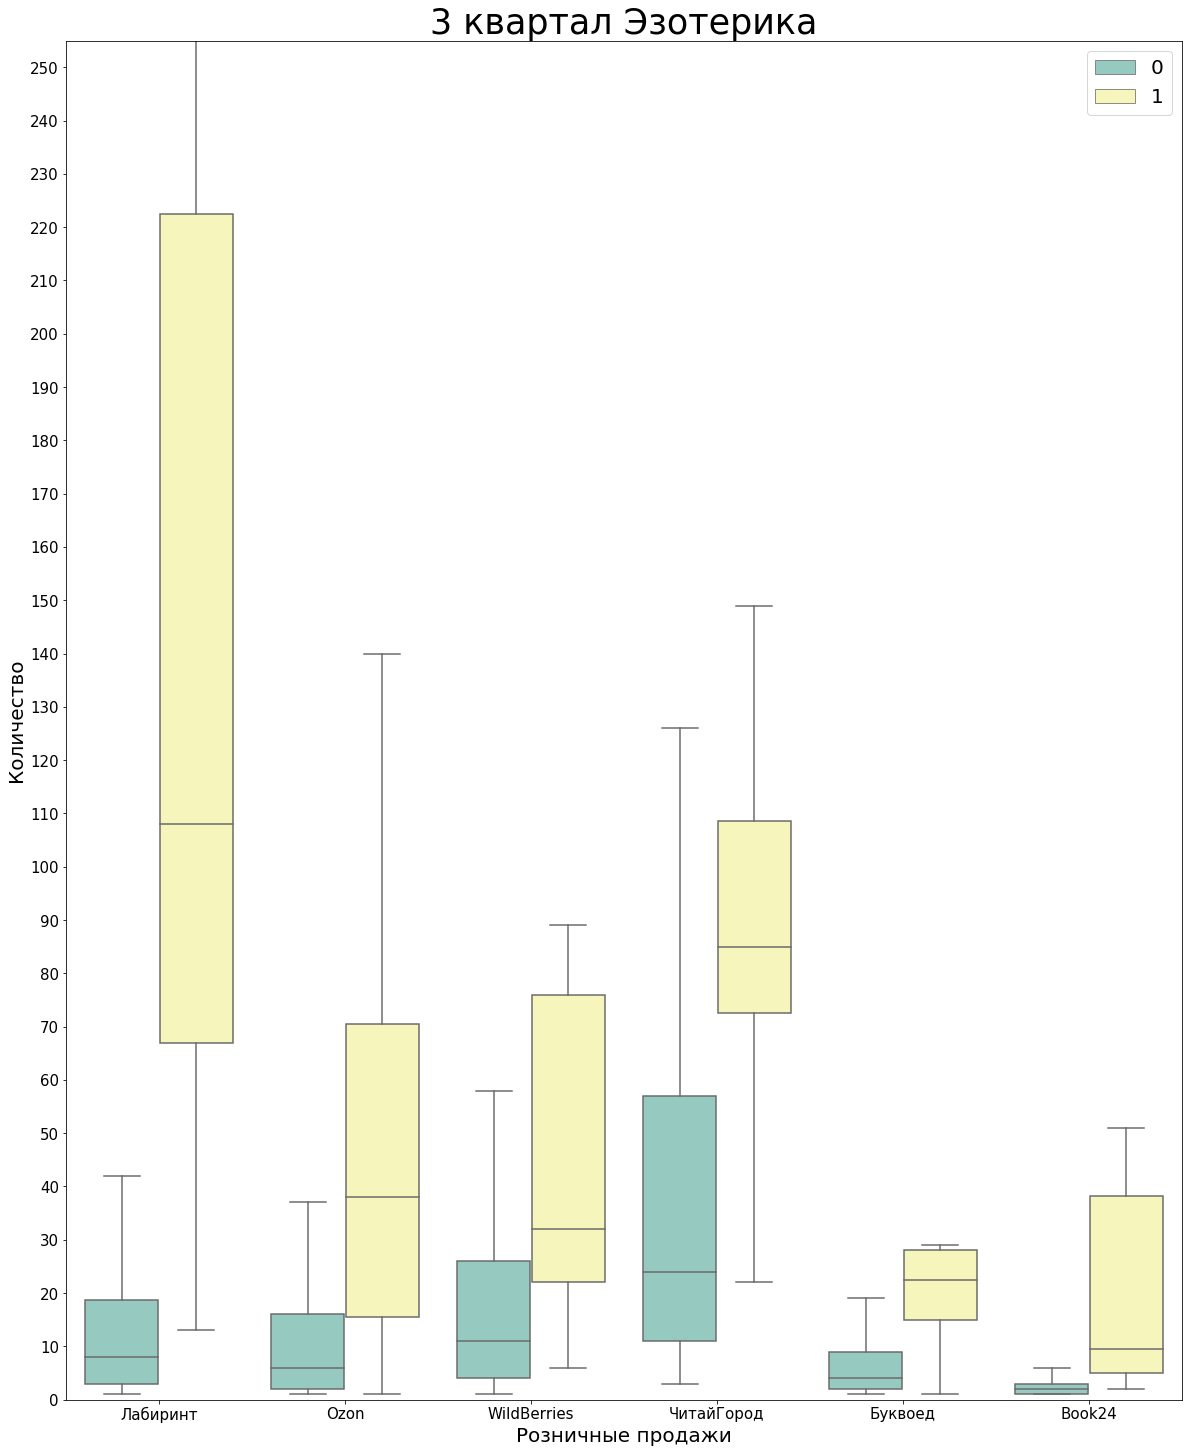

In [91]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = es3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Эзотерика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('es3.png', transparent = True)

tes3 = es3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tes3.to_excel('tes3.xlsx')

In [86]:
s1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'СПОРТ. ФИТНЕС. ОХОТА И РЫБАЛКА')]
s2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'СПОРТ. ФИТНЕС. ОХОТА И РЫБАЛКА')]
s3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'СПОРТ. ФИТНЕС. ОХОТА И РЫБАЛКА')]

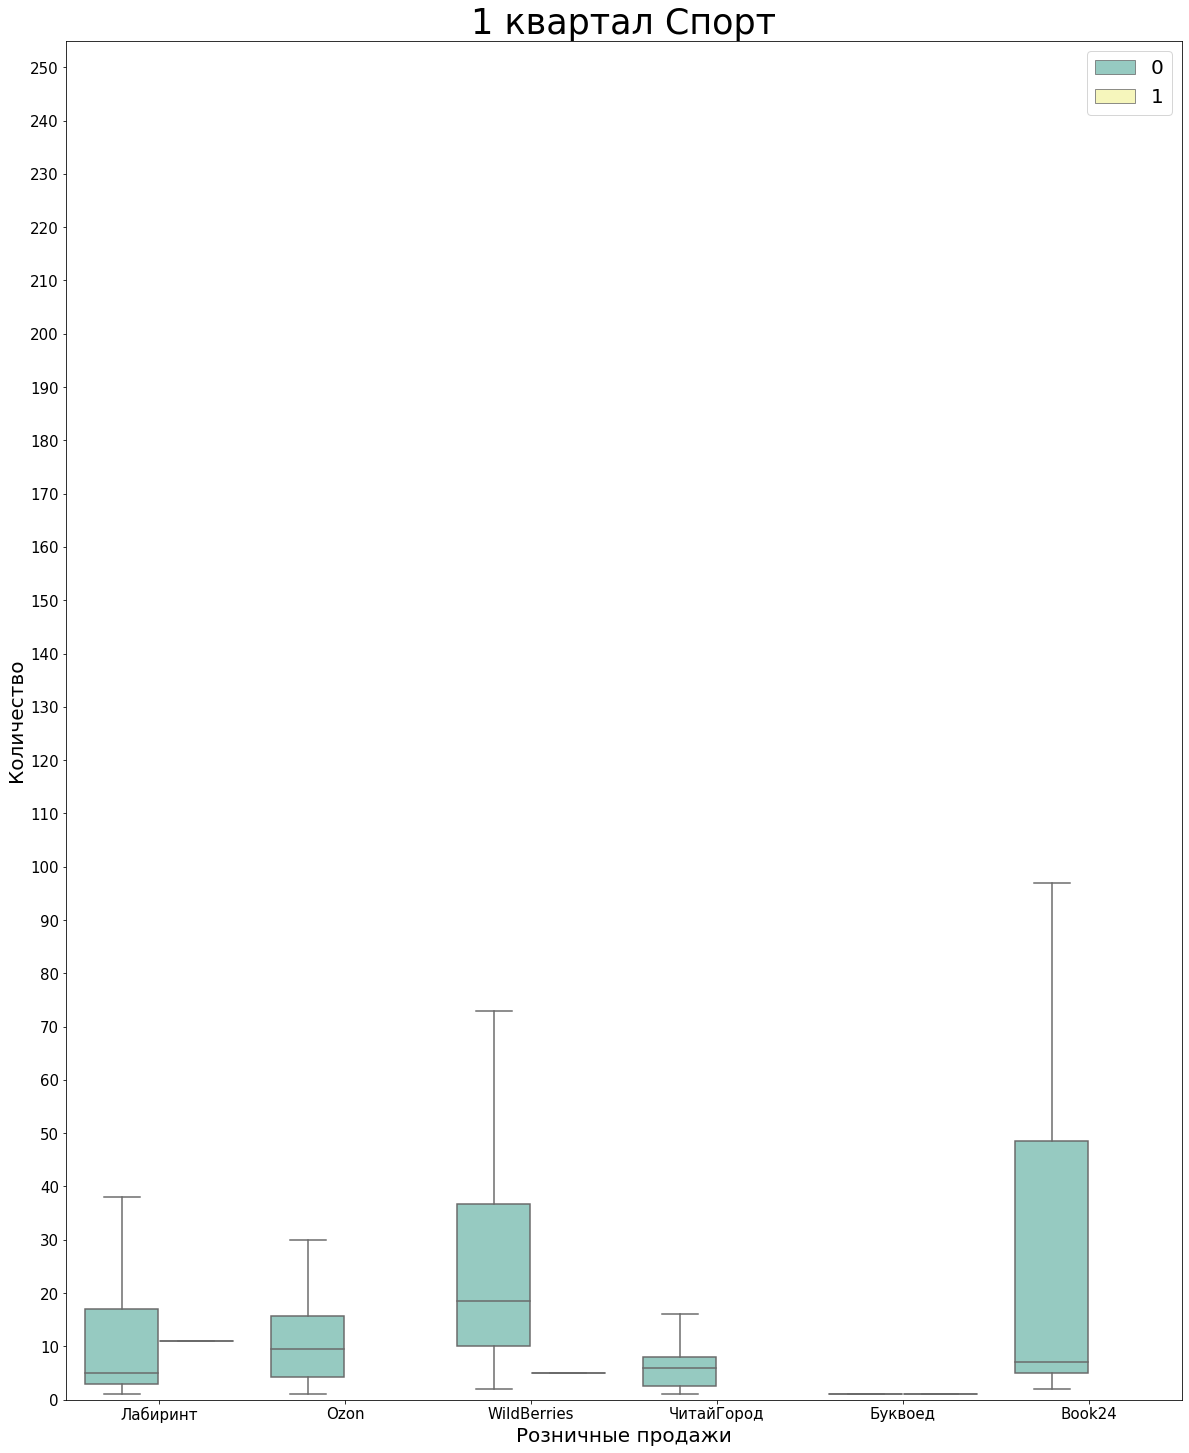

In [92]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = s1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Спорт",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('s1.png', transparent = True)

ts1 = s1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
ts1.to_excel('ts1.xlsx')

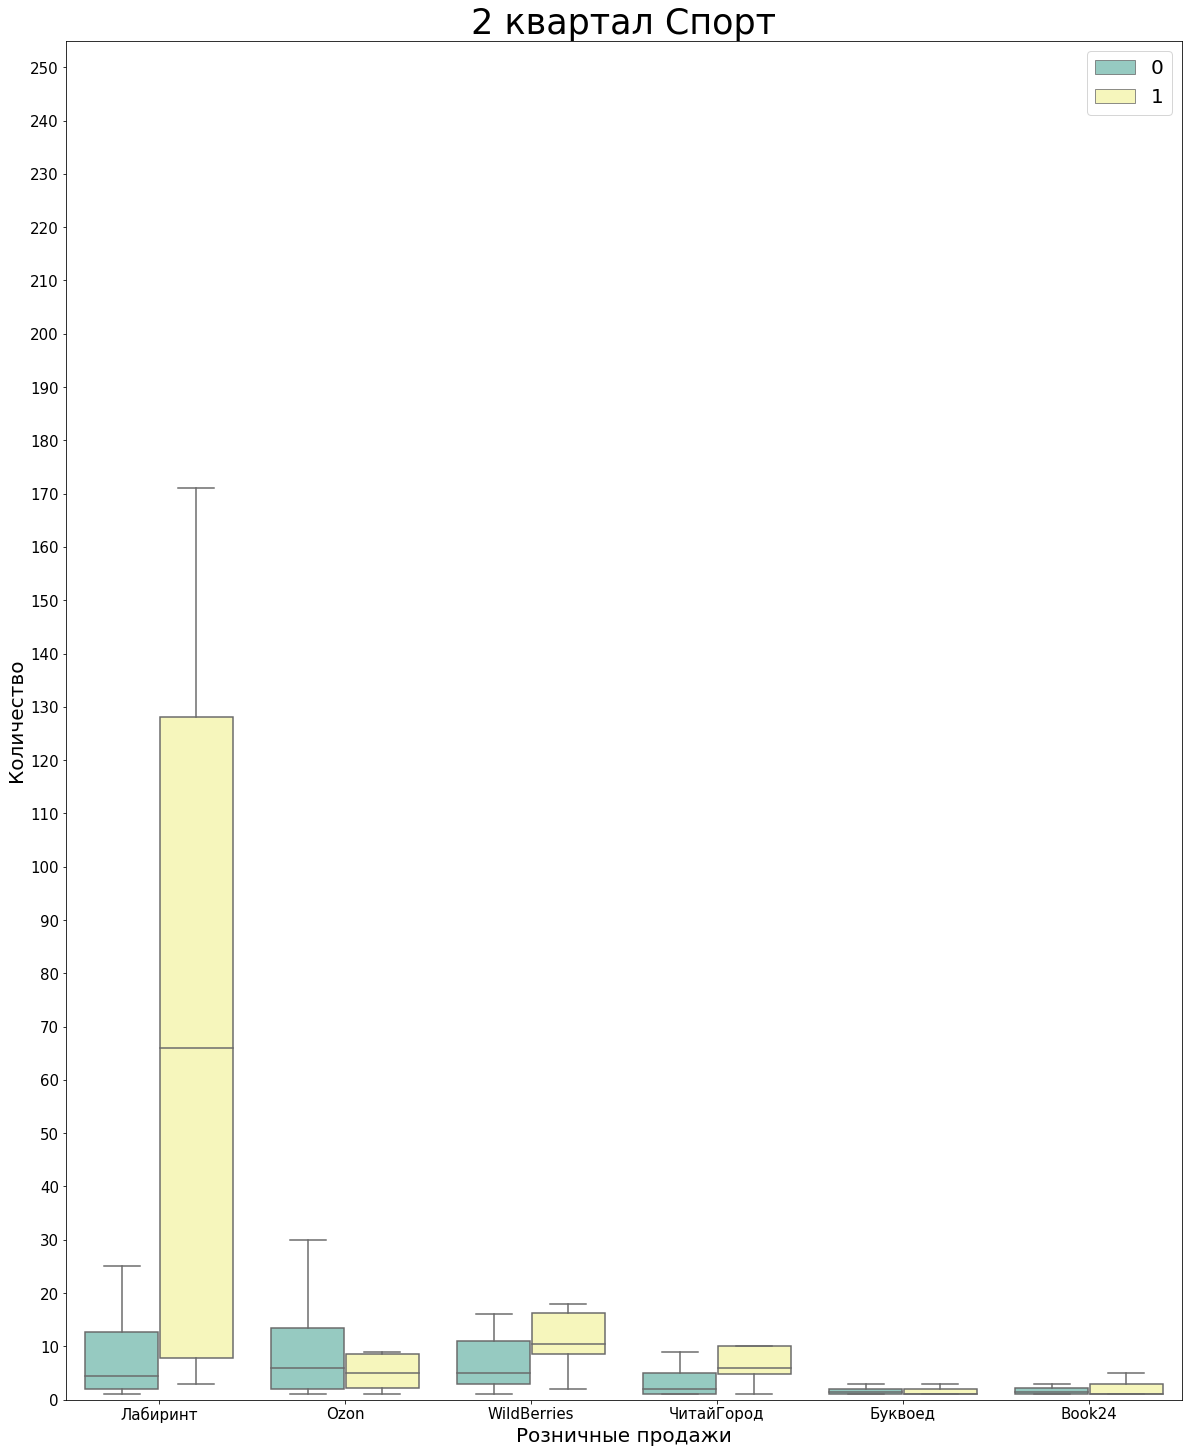

In [93]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = s2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Спорт",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('s2.png', transparent = True)

ts2 = s2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
ts2.to_excel('ts2.xlsx')

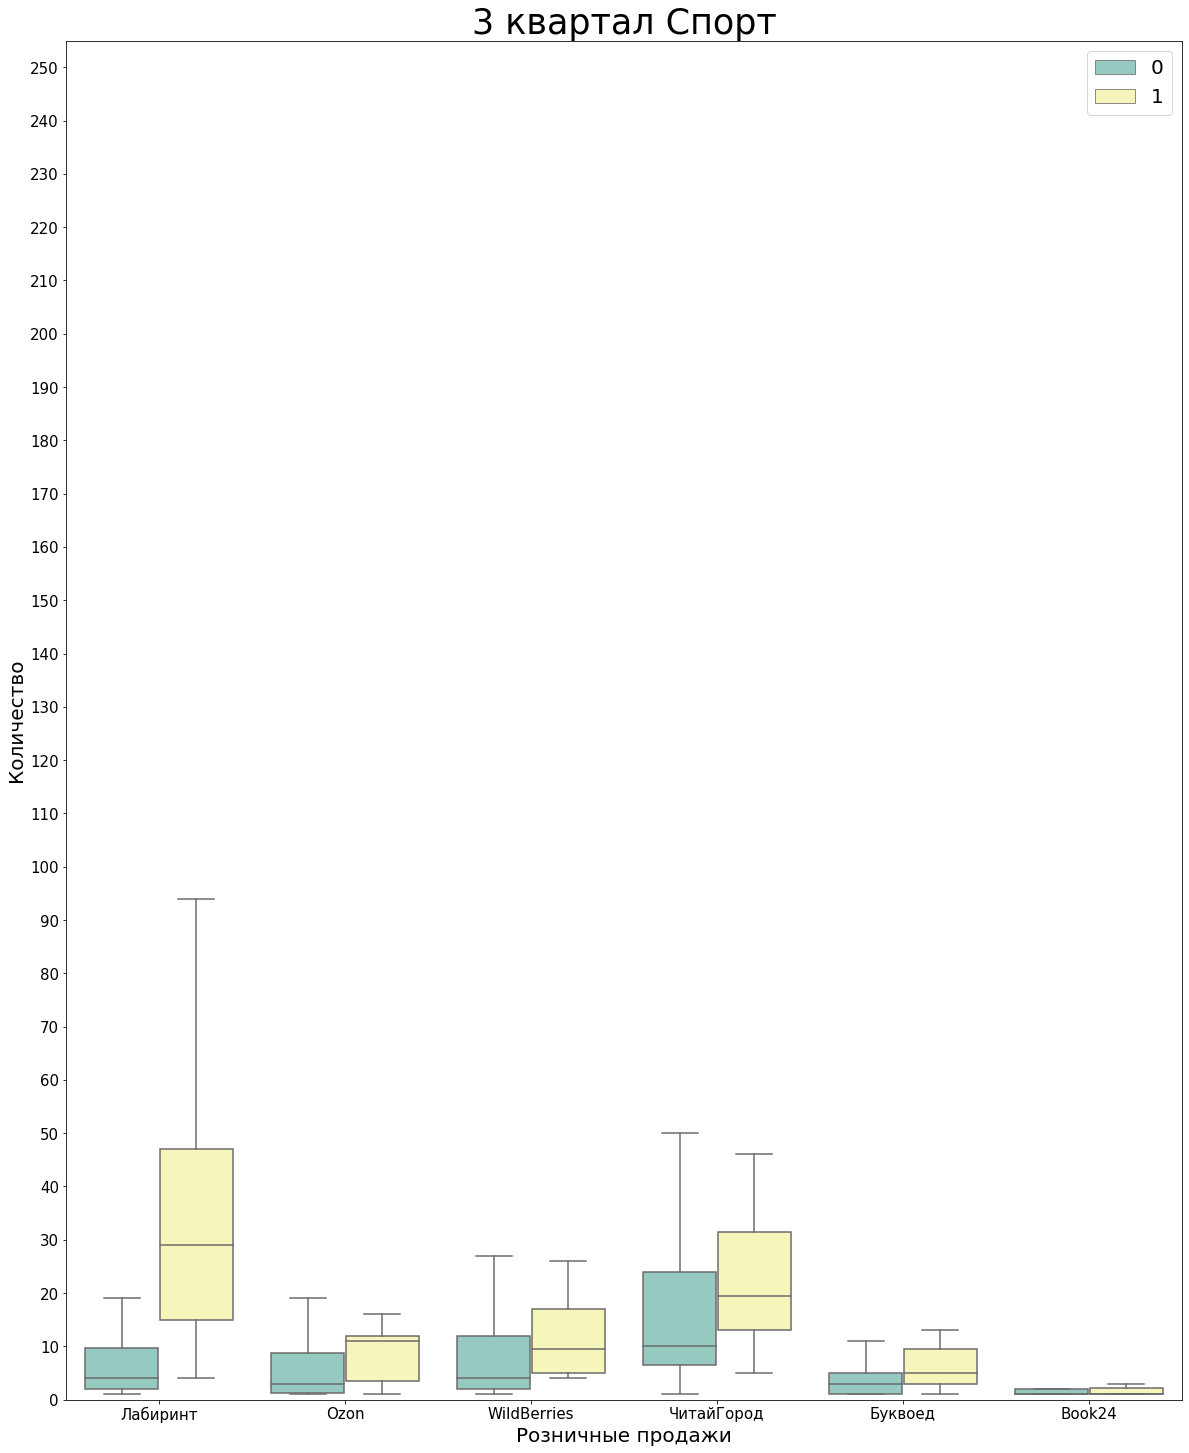

In [94]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = s3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Спорт",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('s3.png', transparent = True)

ts3 = s3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
ts3.to_excel('ts3.xlsx')

In [87]:
ec1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭКОНОМИКА. БИЗНЕС.')]
ec2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭКОНОМИКА. БИЗНЕС.')]
ec3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ЭКОНОМИКА. БИЗНЕС.')]

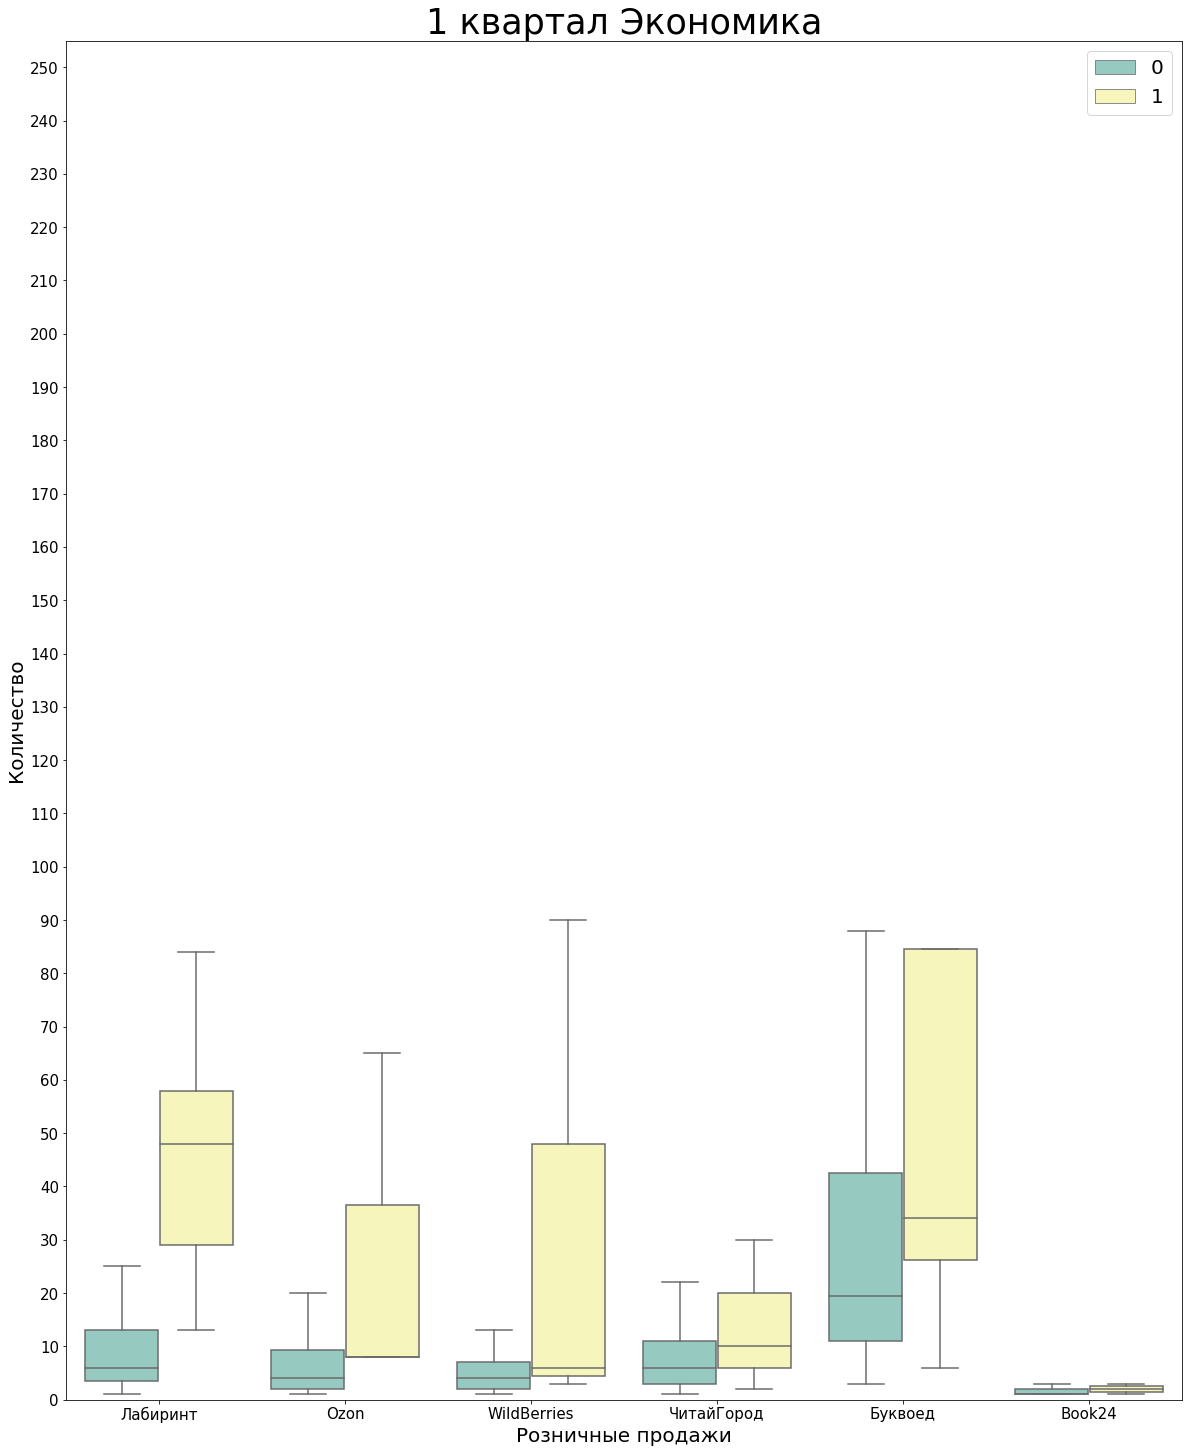

In [95]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = ec1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Экономика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('ec1.png', transparent = True)

tec1 = ec1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tec1.to_excel('tec1.xlsx')

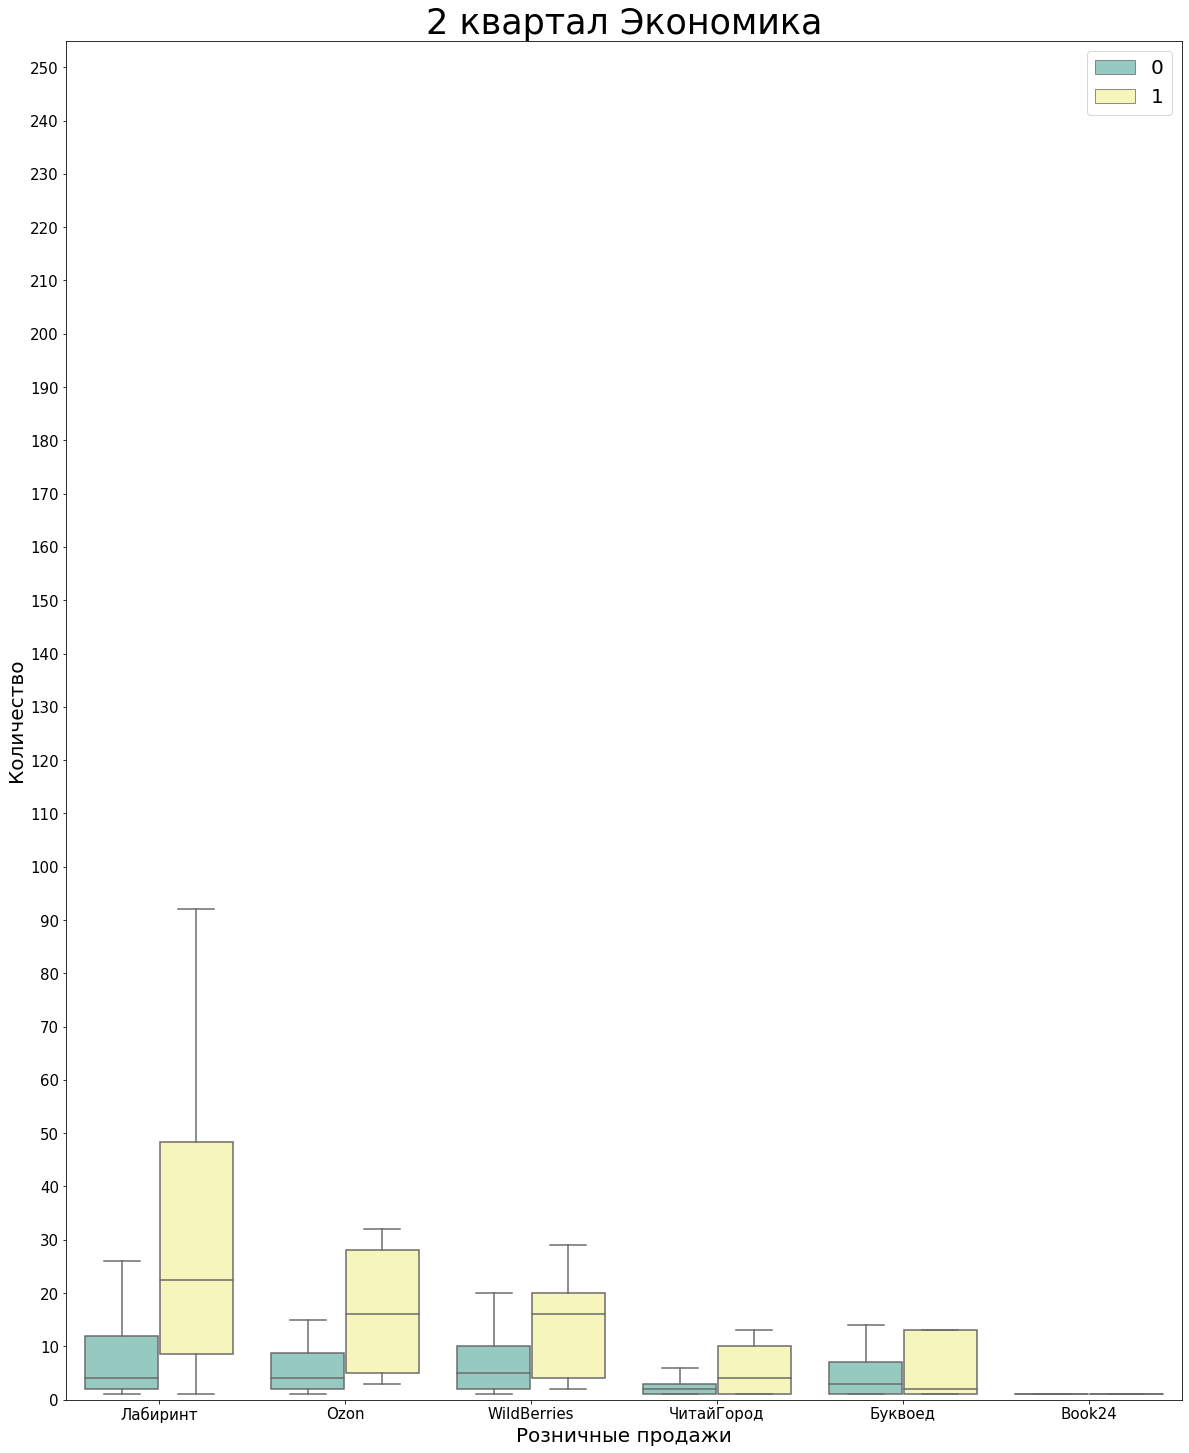

In [96]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = ec2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Экономика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('ec2.png', transparent = True)

tec2 = ec2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tec2.to_excel('tec2.xlsx')

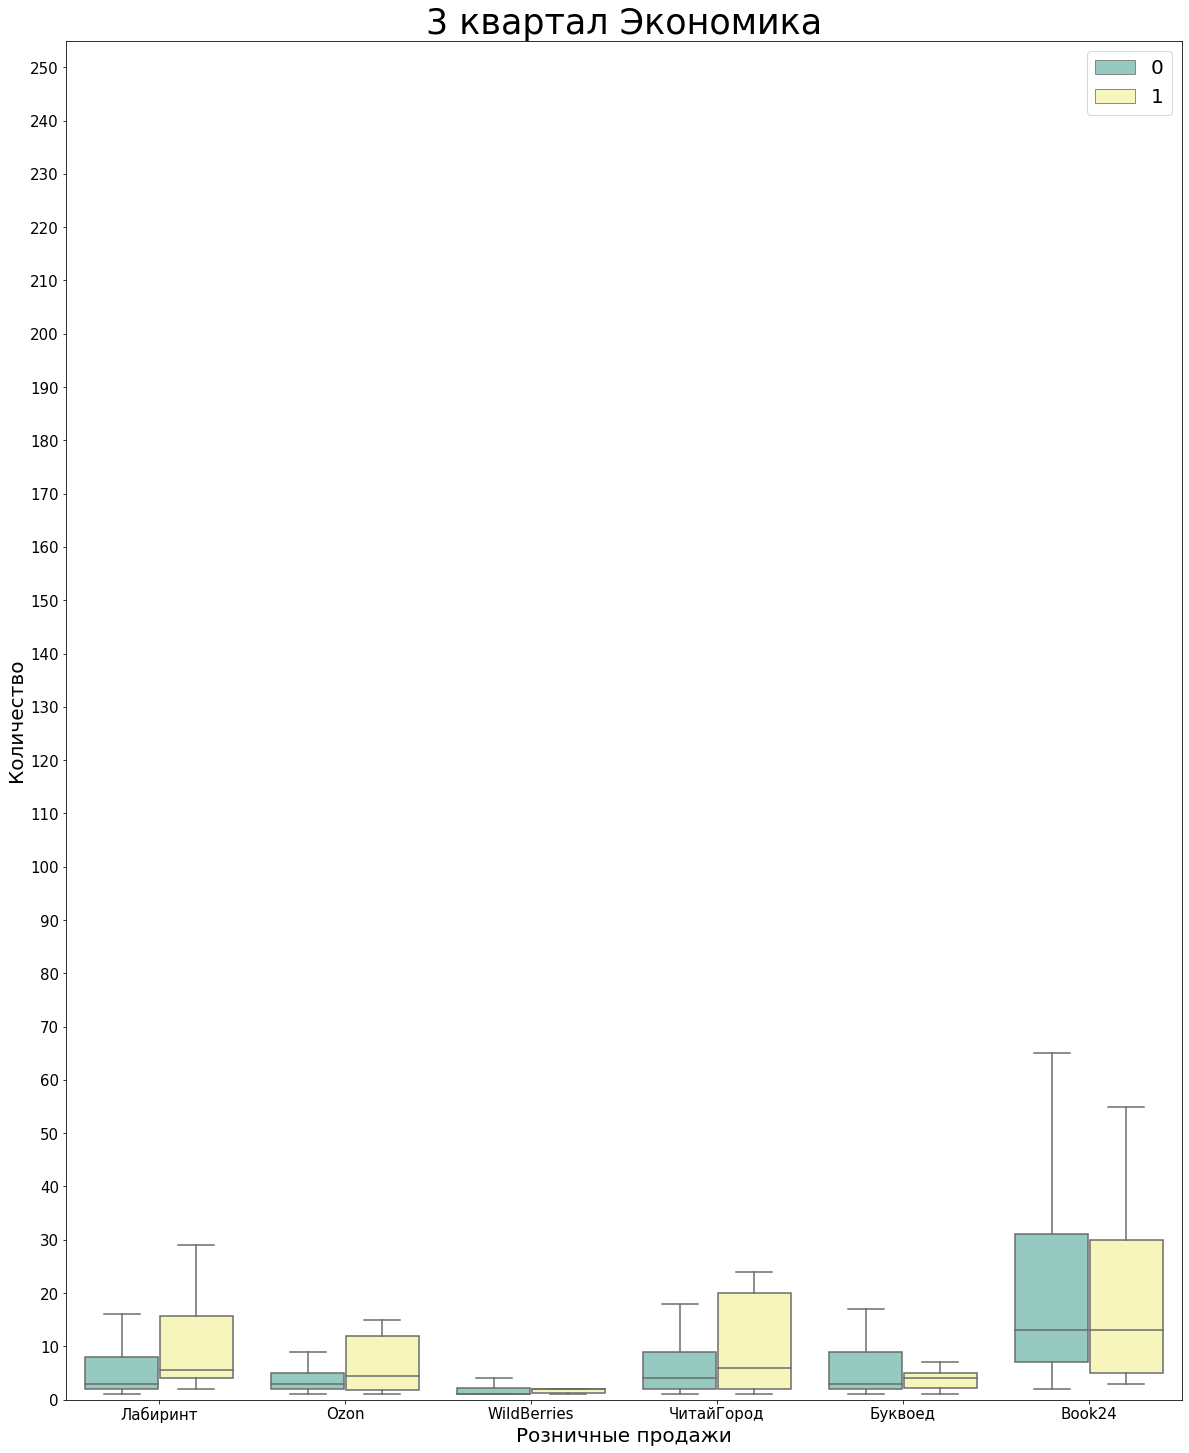

In [97]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = ec3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Экономика",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('ec3.png', transparent = True)

tec3 = ec3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tec3.to_excel('tec3.xlsx')

In [88]:
cul1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'КУЛИНАРИЯ')]
cul2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'КУЛИНАРИЯ')]
cul3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'КУЛИНАРИЯ')]

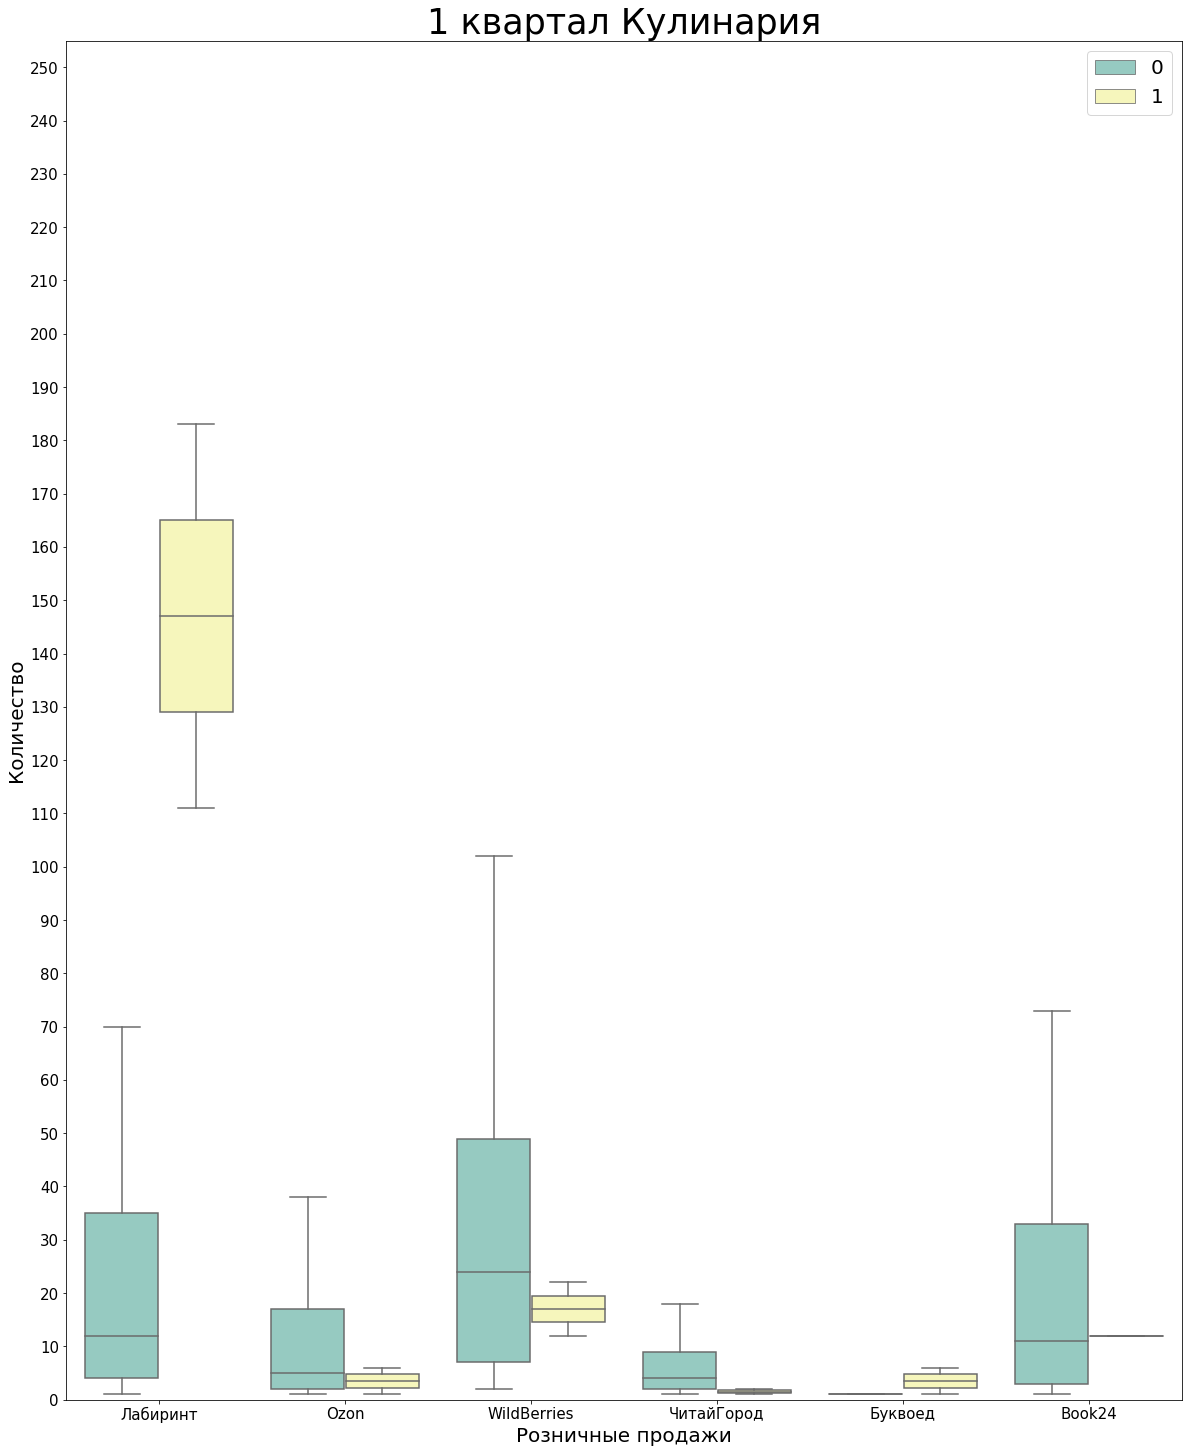

In [98]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = cul1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал Кулинария",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('cul1.png', transparent = True)

tcul1 = cul1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tcul1.to_excel('cul1.xlsx')

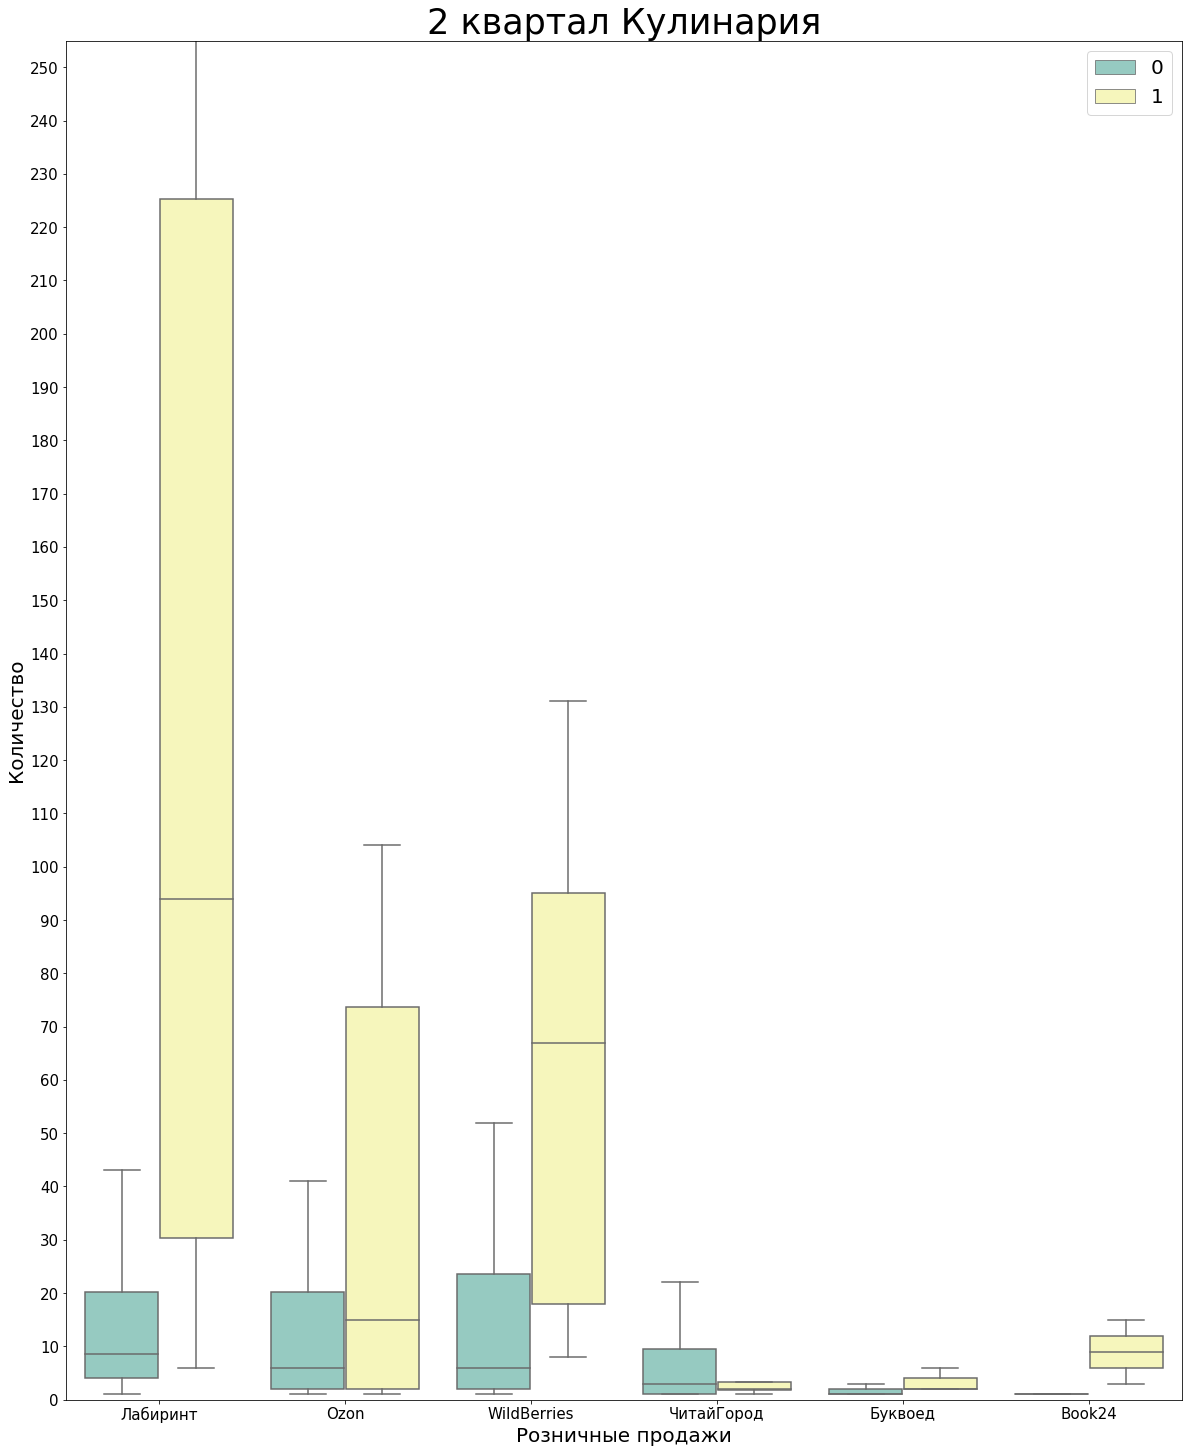

In [99]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = cul2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал Кулинария",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('cul2.png', transparent = True)

tcul2 = cul2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tcul2.to_excel('cul2.xlsx')

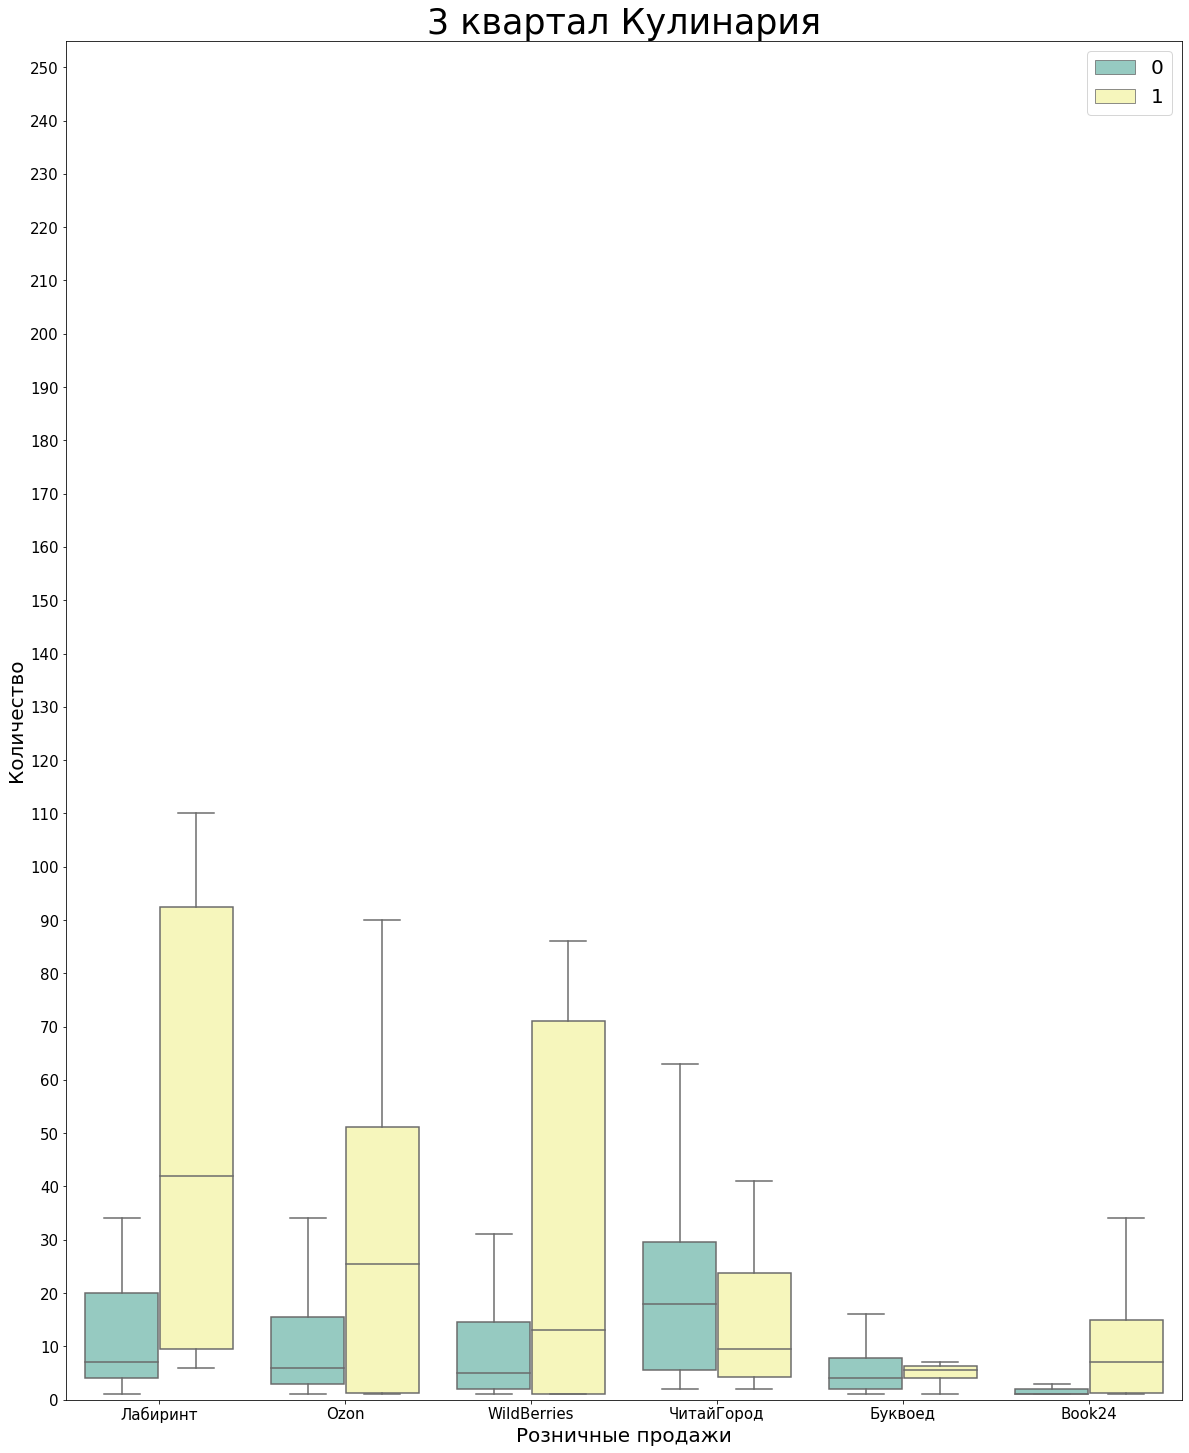

In [100]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = cul3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал Кулинария",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('cul3.png', transparent = True)

tcul3 = cul3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tcul3.to_excel('cul3.xlsx')

In [104]:
is1 = fdata[(fdata['Квартал'] == 1) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСТОРИЧЕСКИЙ РОМАН')]
is2 = fdata[(fdata['Квартал'] == 2) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСТОРИЧЕСКИЙ РОМАН')]
is3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки') & (fdata['Ниша'] == 'ИСТОРИЧЕСКИЙ РОМАН')]

In [109]:
fdata[(fdata['Ниша'] == 'ИСТОРИЧЕСКИЙ РОМАН') & (fdata['Prom'] == 1)]

,1C,ISBN,EAN,Тип_Данных,Месяц,Год,Кол-во,Prom,Квартал,Ниша,Цена


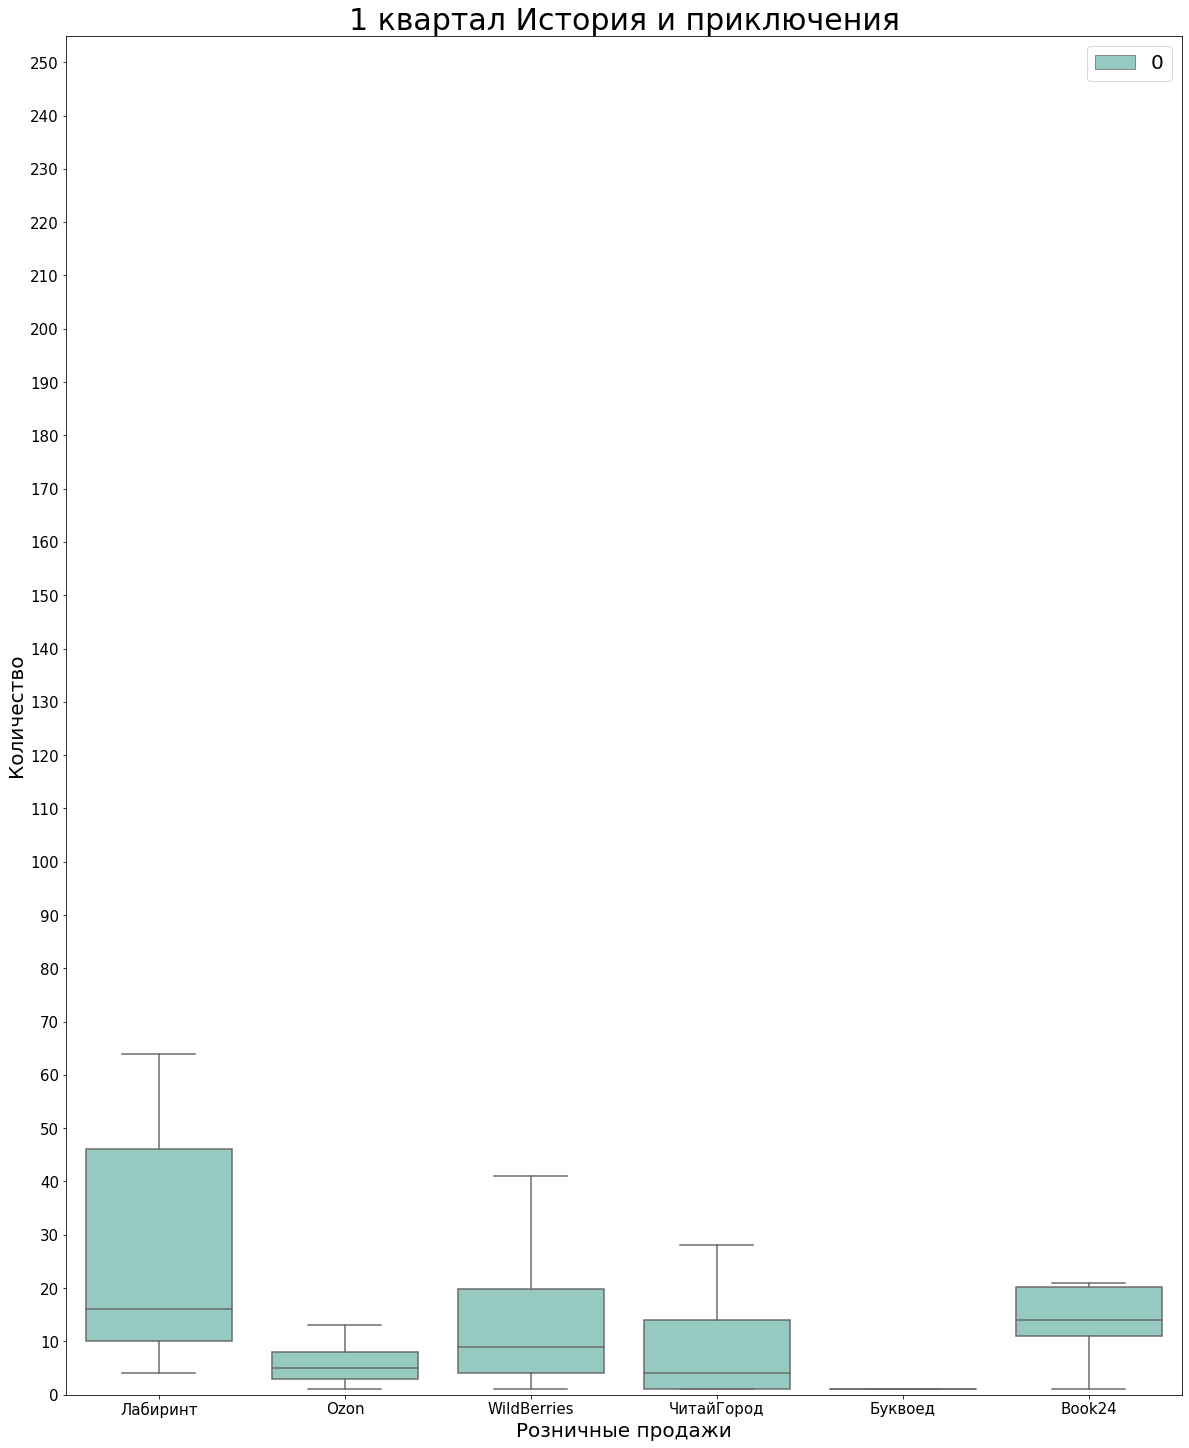

In [105]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = is1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал История и приключения",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('is1.png', transparent = True)

tis1 = is1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tis1.to_excel('tis1.xlsx')

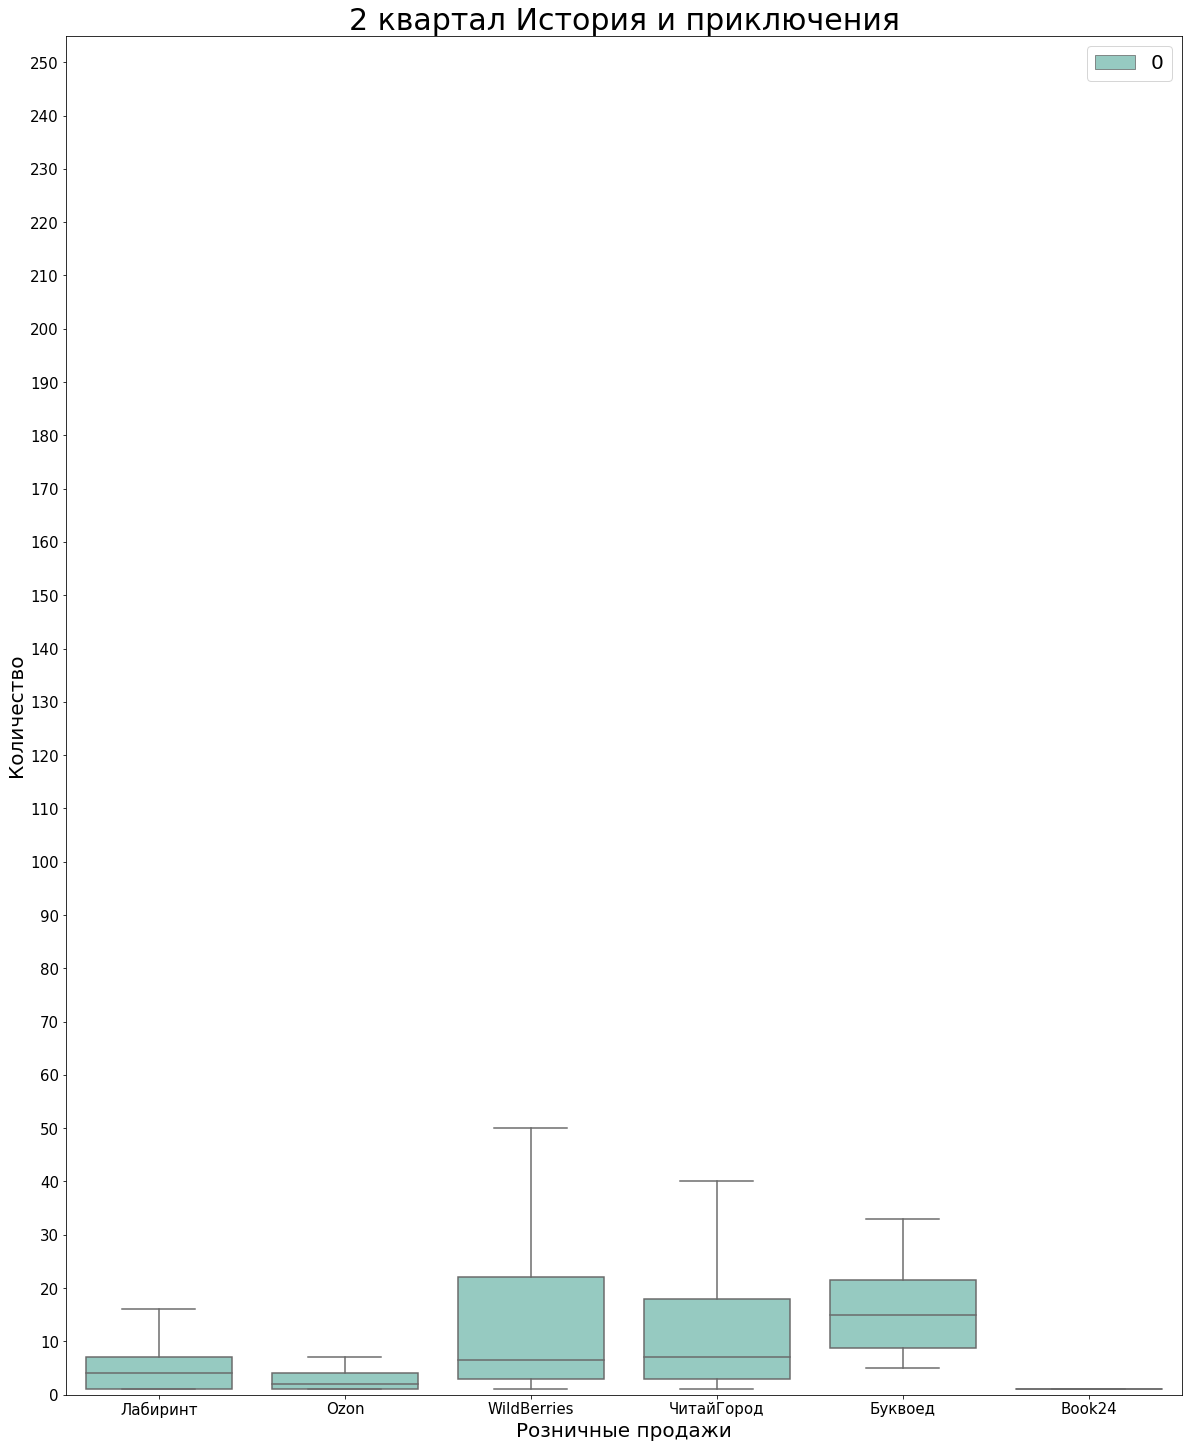

In [106]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = is2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал История и приключения",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('is2.png', transparent = True)

tis2 = is2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tis2.to_excel('tis2.xlsx')

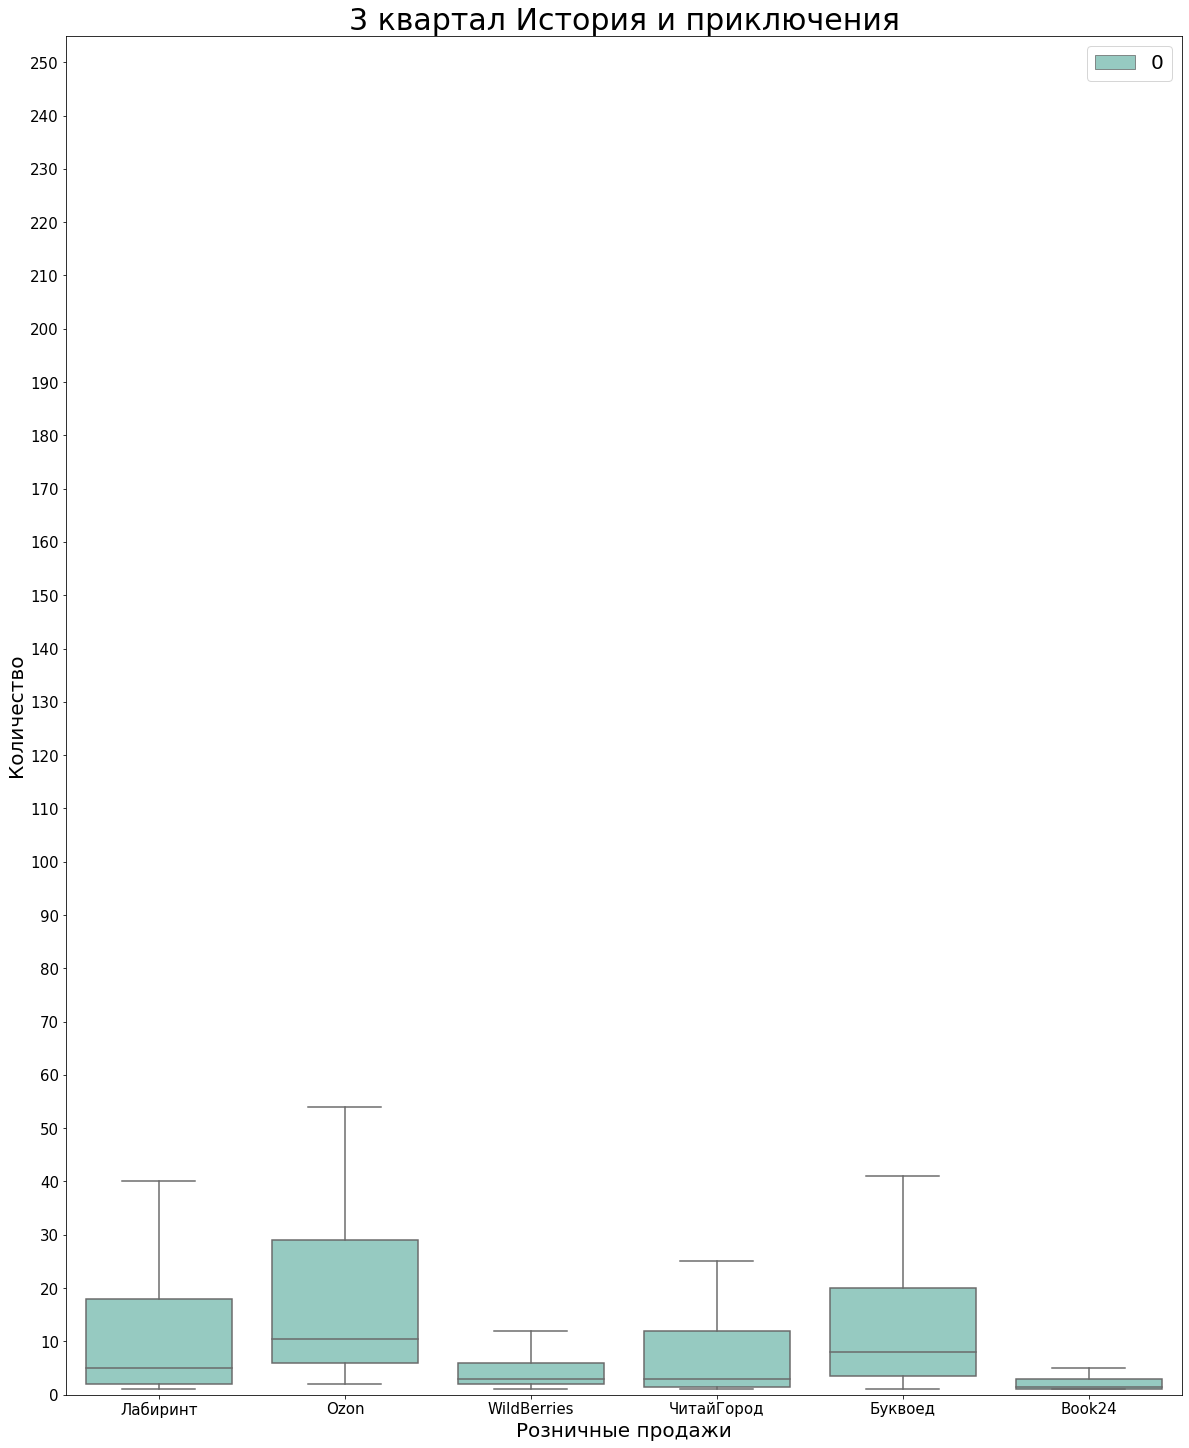

In [107]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = is3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал История и приключения",fontsize=30)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('is3.png', transparent = True)

tis3 = is3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
tis3.to_excel('tis3.xlsx')

In [19]:
kv1 = ndata1[(ndata1['Квартал'] == 1) & (ndata1['Тип_Данных'] != 'Отгрузки')]
kv1.groupby(by = ['Месяц', 'Prom']).mean()

Год     Кол-во  Квартал
Месяц Prom                            
1     0     2020.0  22.313055      1.0
      1     2020.0  87.045872      1.0
2     0     2020.0  22.347169      1.0
      1     2020.0  78.534694      1.0
3     0     2020.0  19.809693      1.0
      1     2020.0  49.241546      1.0

In [20]:
kv2 = ndata1[(ndata1['Квартал'] == 2) & (ndata1['Тип_Данных'] != 'Отгрузки')]

In [21]:
kv3 = ndata1[(ndata1['Квартал'] == 3) & (ndata1['Тип_Данных'] != 'Отгрузки')]

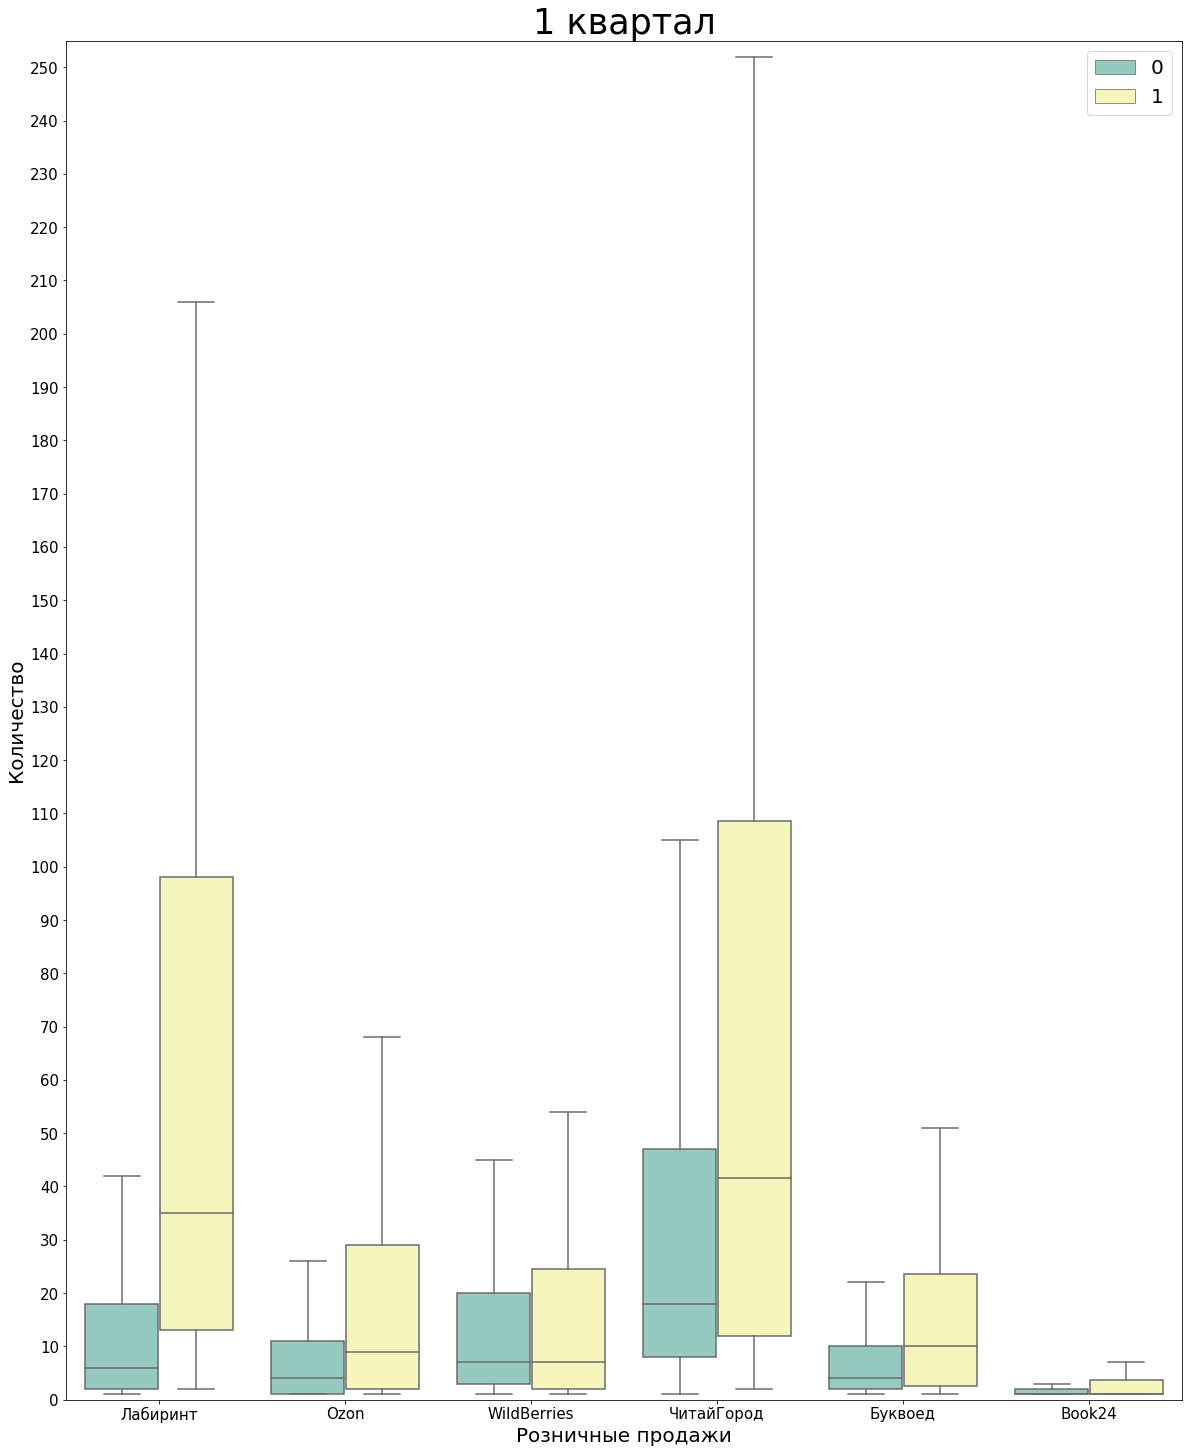

In [17]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = kv1, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("1 квартал",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('kv1.png', transparent = True)

In [18]:
t1 = kv1.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()

In [19]:
t1.to_excel('kv1.xlsx')

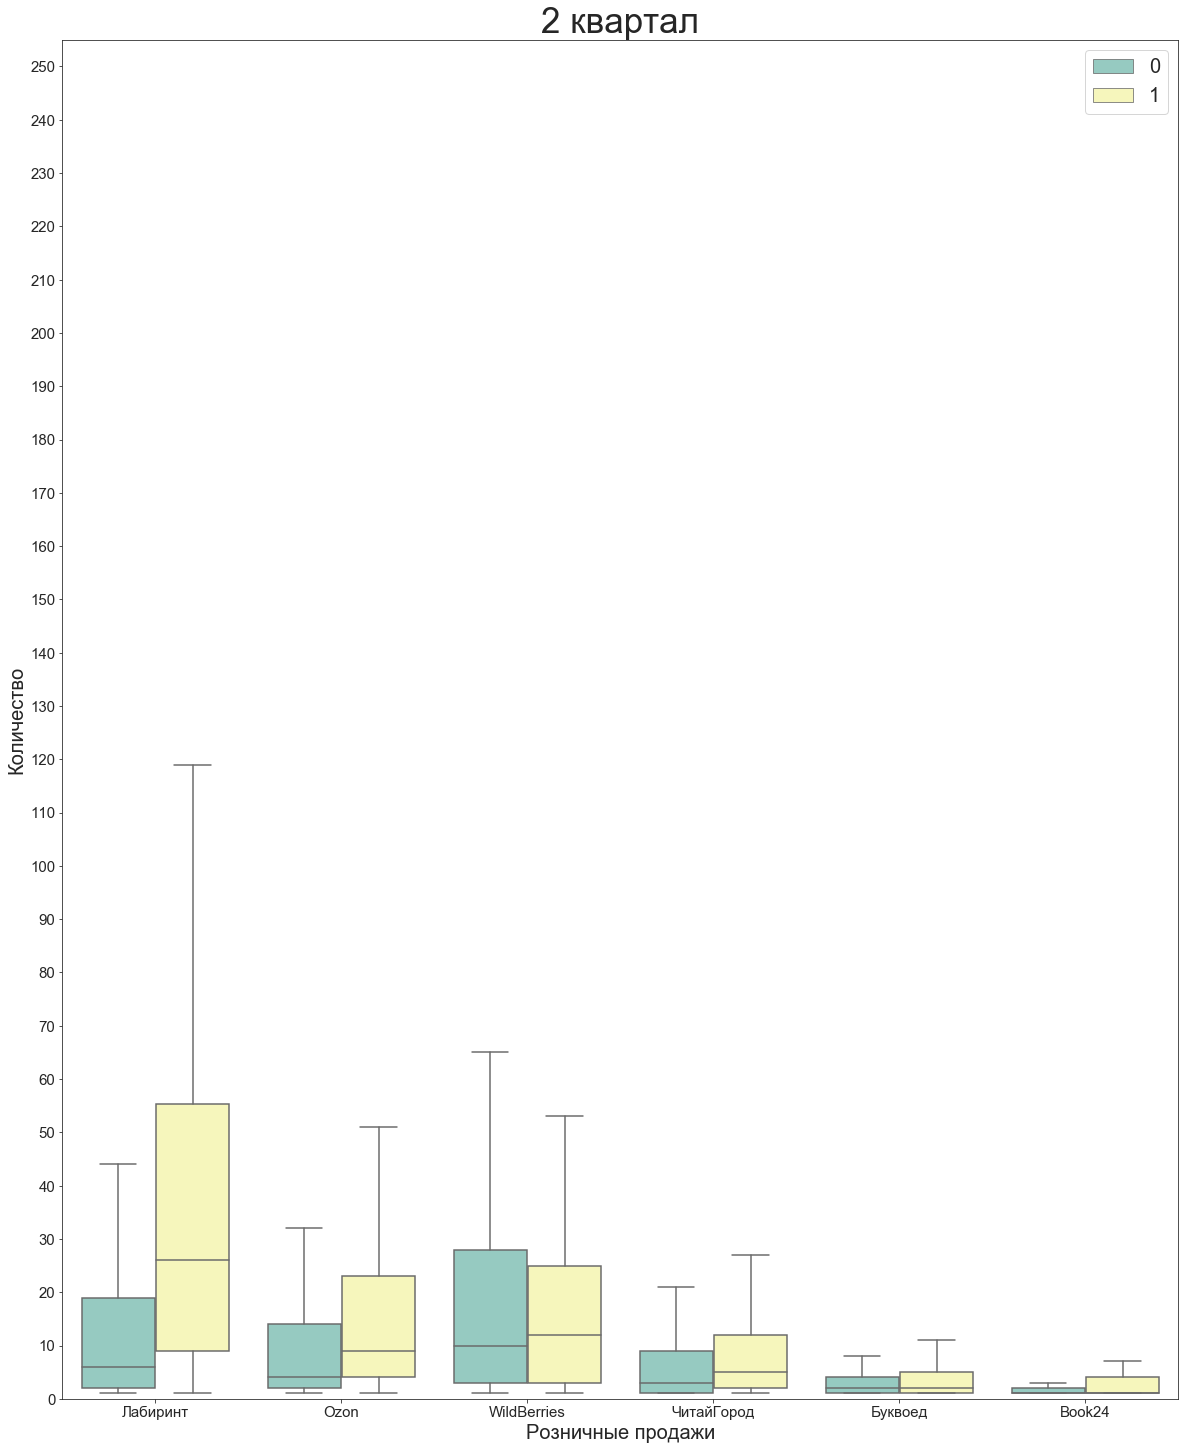

In [50]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = kv2, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("2 квартал",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('kv2.png', transparent = True)

In [20]:
t2 = kv2.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
t2.to_excel('kv2.xlsx')

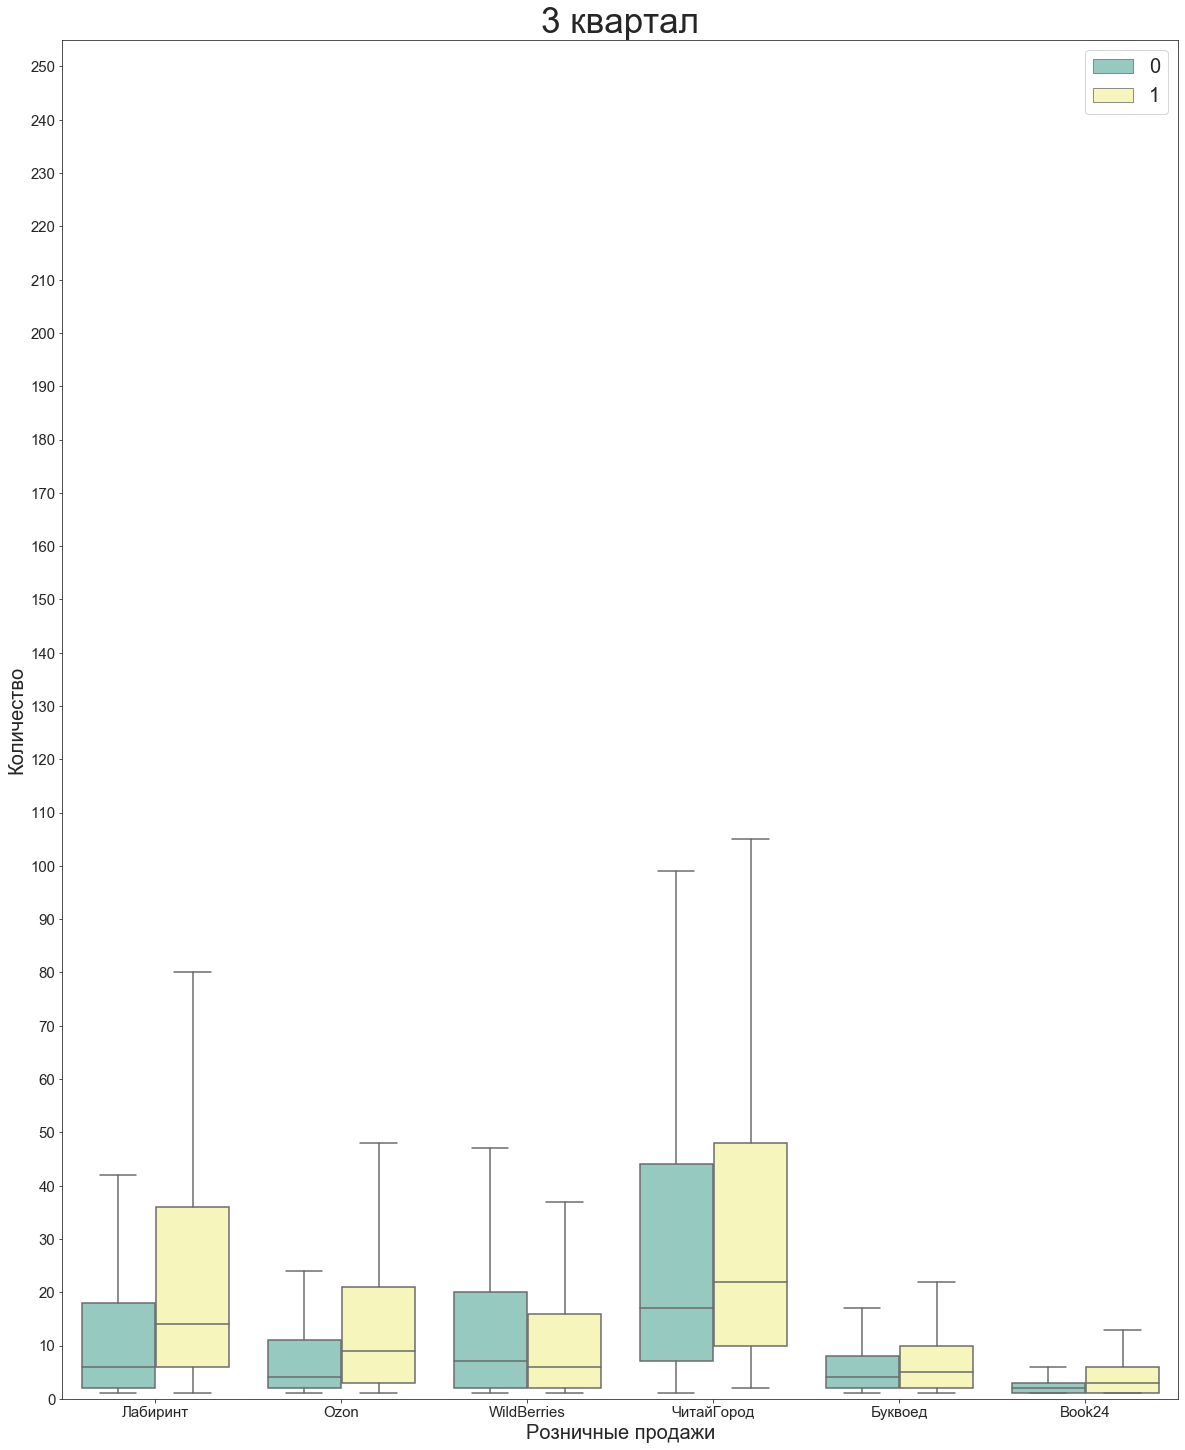

In [52]:
plt.figure(figsize=(20, 25))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = kv3, palette = 'Set3', showfliers = False)

pl.set(ylim=(0,255),
yticks=range(0, 255, 10))
pl.axes.set_title("3 квартал",fontsize=35)
pl.set_xlabel("Розничные продажи",fontsize=20)
pl.set_ylabel("Количество",fontsize=20)
pl.set_yticklabels(pl.get_yticks(), size = 15)
pl.set_xticklabels(['Лабиринт', 'Ozon', 'WildBerries', 'ЧитайГород', 'Буквоед', 'Book24'], size = 15)
pl.legend(fontsize=20)
plt.savefig('kv3.png', transparent = True)

In [21]:
t3 = kv3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
t3.to_excel('kv3.xlsx')

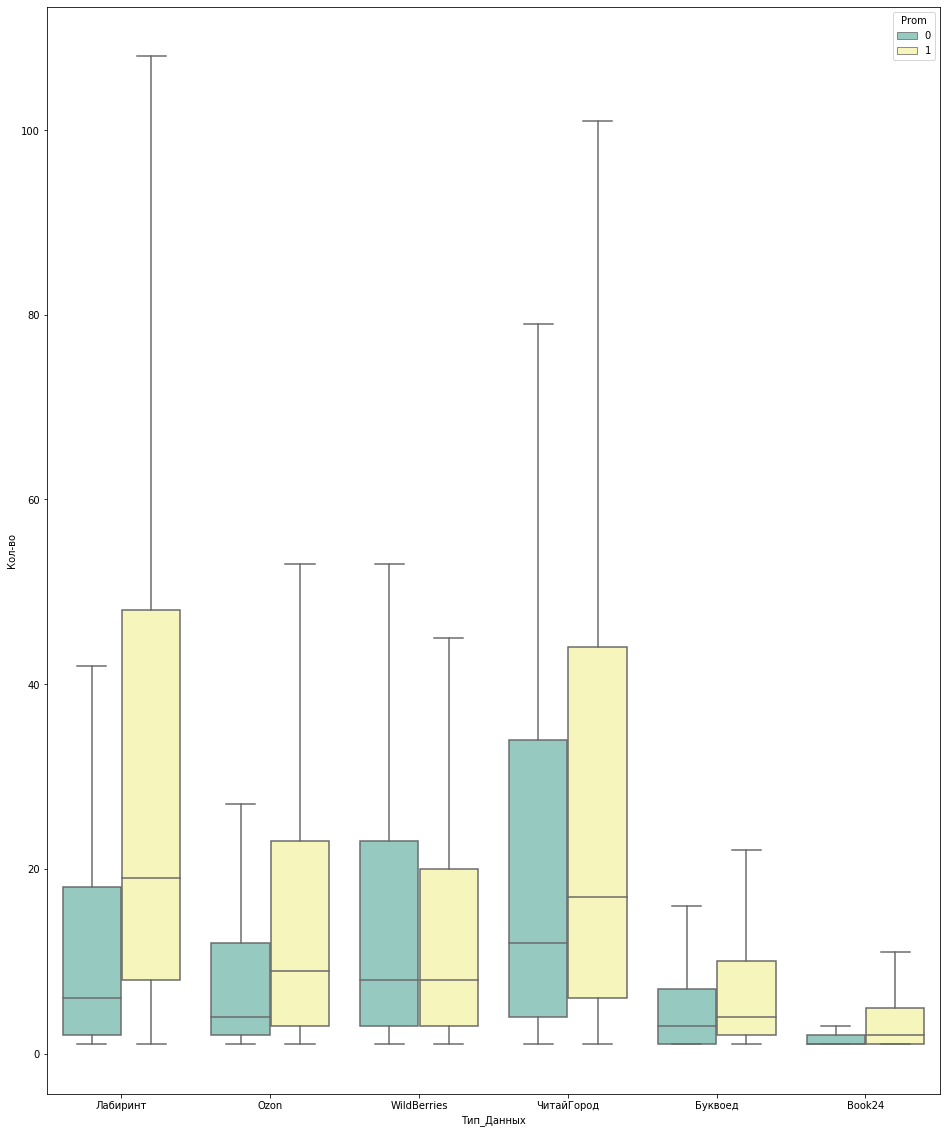

In [63]:
plt.figure(figsize=(16, 20))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = notgr1, palette = 'Set3', showfliers = False)

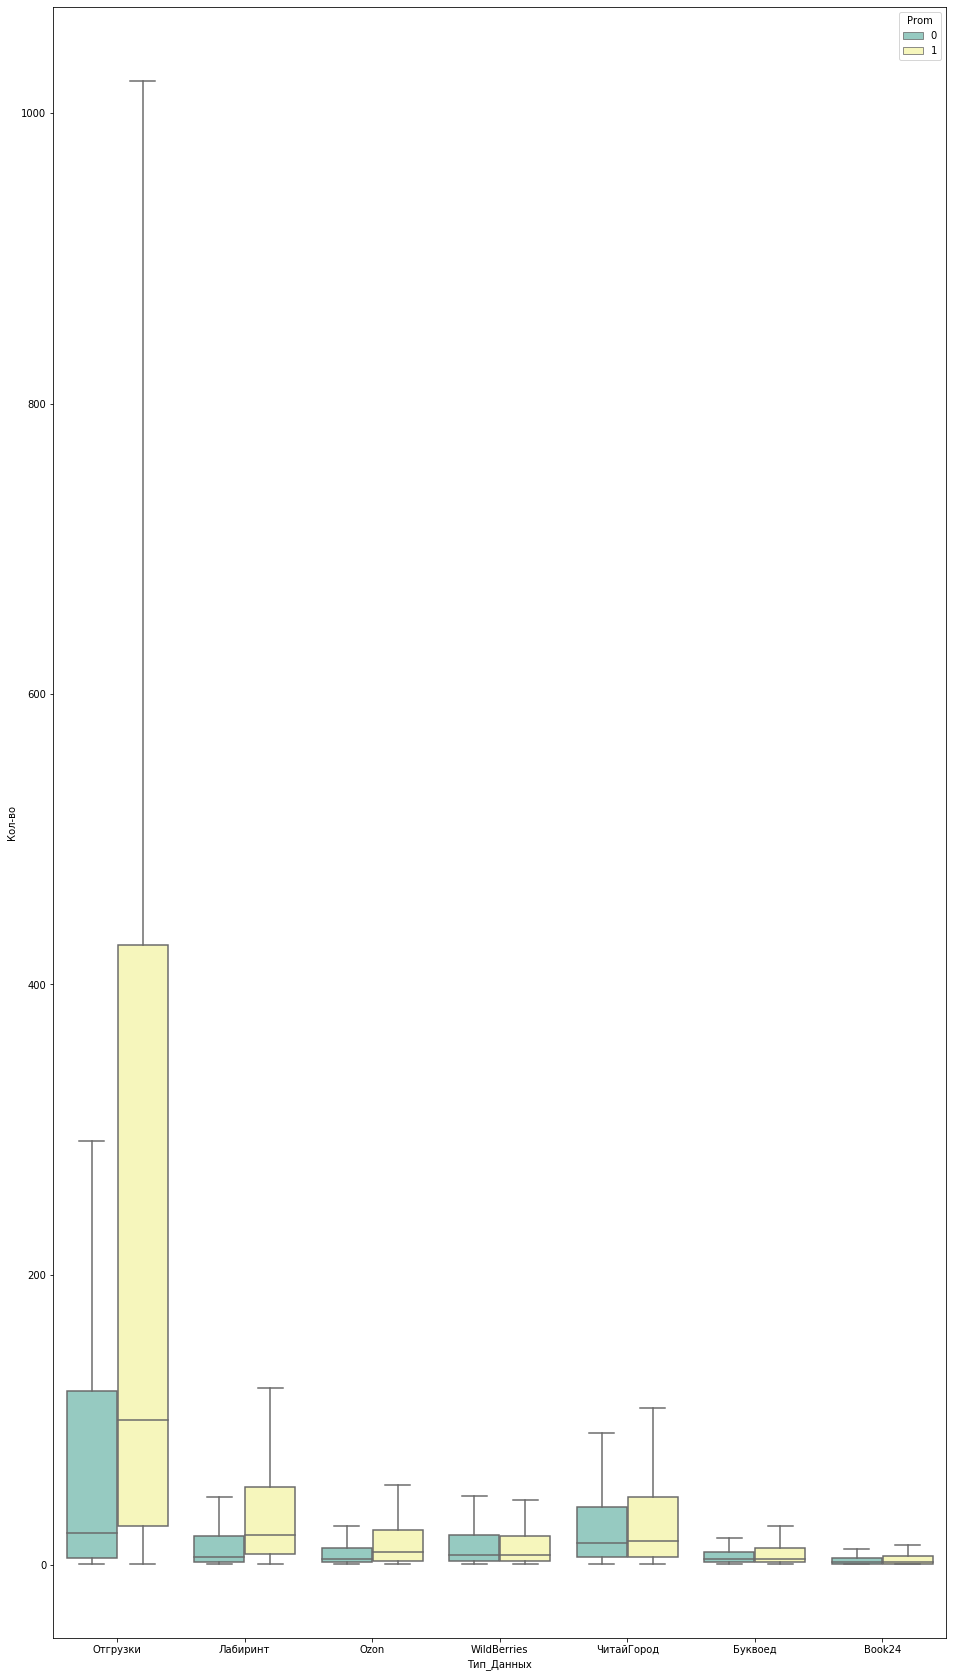

In [23]:
plt.figure(figsize=(16, 30))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = ndata, palette = 'Set3', showfliers = False)

In [60]:
corr = ndata1.corr()

In [24]:
books = pd.read_excel('Данные по книгам.xlsx')

In [25]:
b1 = books[['Код 1С', 'Ниша', 'Цена базовая']]

In [26]:
ndata1.columns = ['1C' if x=='Код_1С' else x for x in ndata1.columns]

In [27]:
b1.columns = ['1C', 'Ниша', 'Цена']

In [28]:
fdata = pd.merge(ndata1,
                 b1,
                 on = '1C',
                 how ='inner')

In [95]:
fdata.to_excel('regdata.xlsx')

In [30]:
kv3 = fdata[(fdata['Квартал'] == 3) & (fdata['Тип_Данных'] != 'Отгрузки')]

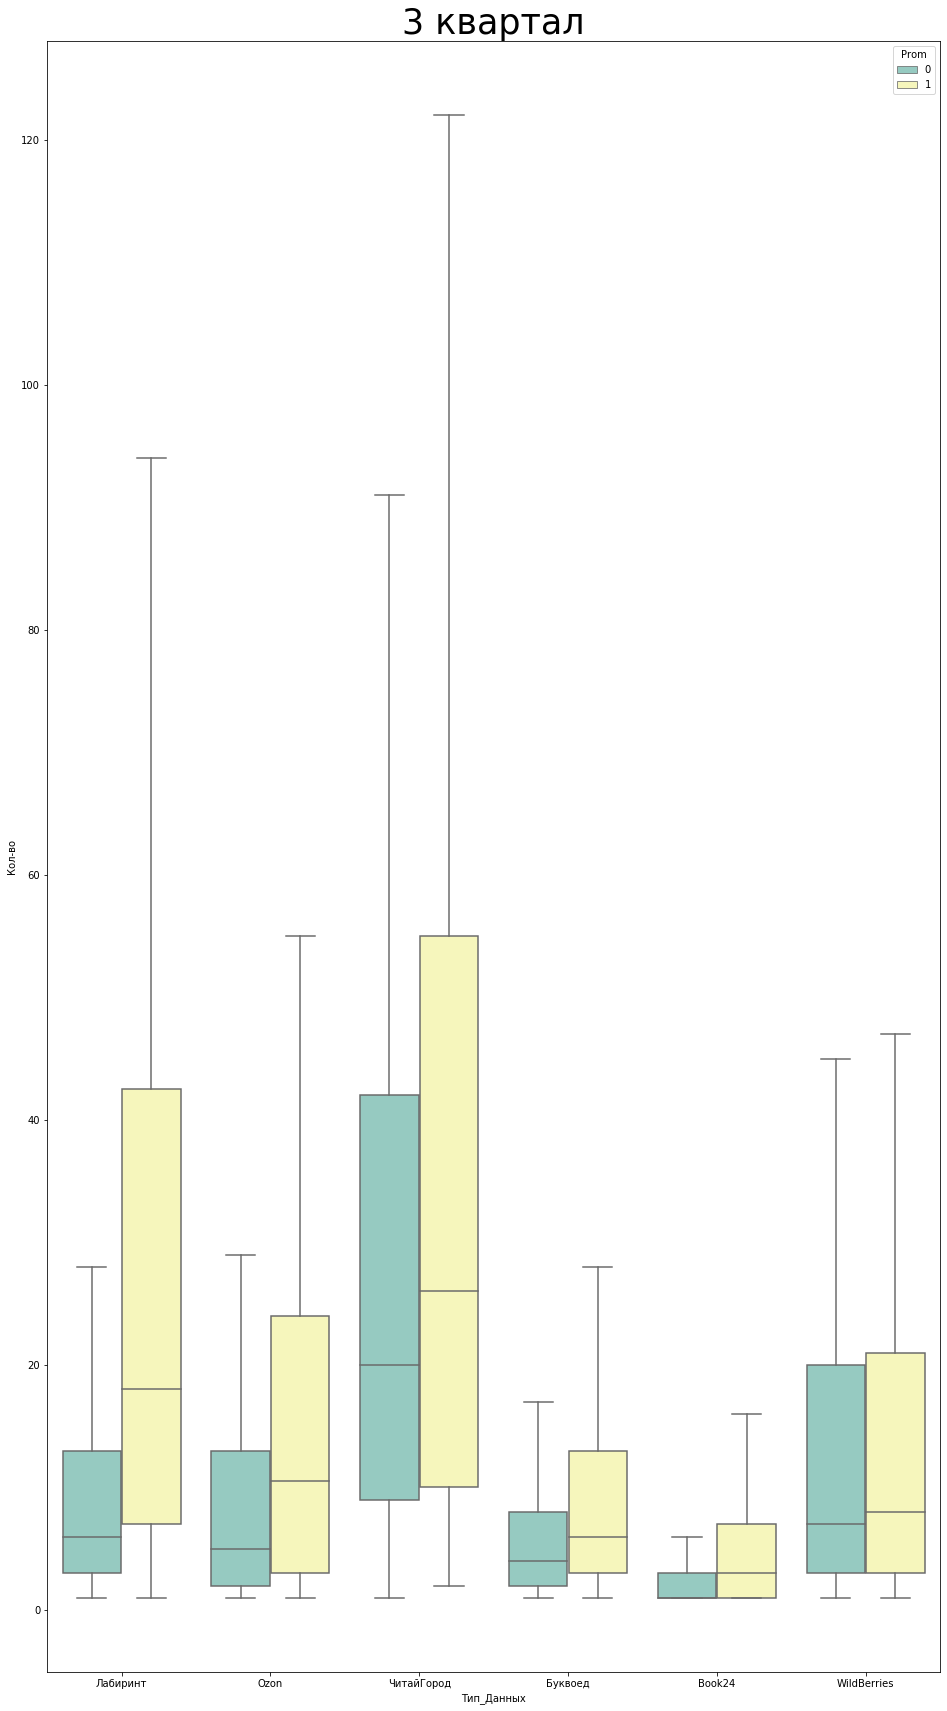

In [33]:
plt.figure(figsize=(16, 30))
pl = sns.boxplot(x = 'Тип_Данных', y = 'Кол-во', hue = 'Prom', data = kv3, palette = 'Set3', showfliers = False)
pl.axes.set_title("3 квартал",fontsize=35)
plt.savefig('3kvart.png', transparent = True)

In [34]:
t3 = kv3.groupby(by=['Тип_Данных', 'Prom'])['Кол-во'].describe()
t3.to_excel('3kvar.xlsx')